# load & prepare data

In [ ]:
########
# connect drive colab dir
########

from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)
path="/content/gdrive/MyDrive/UKR_PAIN/"

In [751]:
########
#local path
########


path='./'
img_path='./IMG/'

In [2]:
import numpy as np
import pandas as pd
import scipy
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

In [ ]:
#############
# Some helpfull classes and functions
#############

In [406]:
class HeadName():
  '''
  Class to help with pandas headers
  class exemplar can return list of dictionary values to use in pandas dataframe

  METHODS:
    __getitem__(keys)
    __call__(keys)
    reverse_dict(keys)
    orig(keys)
  
  '''
  def __init__(self):
      self.h={'COUNT':'count',
              'A':'A-Time',
             'B':'B-sex',
             'C':'C-leaved', 
             'D':'D-age',
             'E':'E-country',
             'F':'F-education',
             'G':'G-diagnosis',
             'H':'H-concomitents',
             'I':'I-pain_intensity',
             'J':'J-favorit_colour',
             'K':'K-threatening_event(death,sexual)',
             'L':'L-involuntary_memories_after_thr_event',
             'M':'M-distress_feelings_after_thr_event',
             'N':'N-colour_for_current_state',
             'O':'O-tring_not_thinking_about_thr_event', 
             'P':'P-avoiding_people-locations-objects_remembering_about_thr_event',
             'Q':'Q-trouble remembering_thr_event_details', 
             'R':'R-trust_no_one_after_thr_event', 
             'S':'S-most_intense_pain_in_last_4wks', 
             'T':'T-blame_yourself_in_thr_event',
             'U':'U-feel_fear-guilt-shame_about_thr_event',
             'V':'V-not_interested_in_activity_was_before_thr_event',
             'W':'W-colour_for_yor_pain',
             'X':'X-feel_detached_from_people',
             'Y':'Y-find_difficult_to_feel_happiness-contentment-love',
             'Z':'Z-angrier_than_before_thr_event', 
             'AA':'AA-more_self_destructive',
             'AB':'AB-always_ready',
             'AC':'AC-sleep_trouble', 
             'AD':'AD-color_for_how_do_you_feel_now',
             'AE':'AE-can_new_behavior or thoughts_be_attributed_to_substance-disease',
             'AF':'AF-these_problems_caused_difficulties_in_relationships-work-studies'}

      self.orig_dict={'A': 'Time',
               'B': 'Позначте свою стать',
               'C': 'Ви покинули місце проживання',
               'D': 'Позначте свій вік',
               'E': "Вкажіть країну проживання на даний момент (не обов'язково)",
               'F': 'Позначте свою освіту',
               'G': 'Діагноз з привiду хронічного болю',
               'H': 'Супутні захворювання',
               'I': 'Оцініть інтенсивність вашого болю від 0 до 10, де 0 = ні болю, ні дискомфорту; 10 – максимальний біль, який можна уявити (найсильніший біль, який можна уявити)',
               'J': 'Ваш улюблений колір',
               'K': 'Ви переживали, були свідком або чули від близької вам людини (родини чи друга) про загрозливу подію? Приклади включають реальну смерть або загрозу смерті, серйозні травми або сексуальне насильство',
               'L': 'Після того, як сталася ця подія, чи відчуваєте ви повторювані мимовільні спогади чи сни, які змушують вас страждати?',
               'M': 'Чи засмучує вас видовище, звуки, запахи або почуття, які нагадують вам про травматичну подію?',
               'N': 'Позначте колір, який найкраще відображає ваш поточний стан',
               'O': 'Чи намагаєтеся ви не думати про травматичну подію?',
               'P': 'Чи намагаєтеся ви не бачити людей, ходити в місця або бачити предмети, які асоціюються з травматичною подією?',
               'Q': 'Вам важко згадати важливий аспект травматичної події?',
               'R': 'Через цю подію ви тепер вірите, що нікому не можна довіряти?',
               'S': 'Наскільки сильним був найсильніший біль за останні 4 тижні?',
               'T': 'Ви звинувачуєте себе в події?',
               'U': 'Чи відчуваєте ви страх, провину чи сором з приводу травматичної події?',
               'V': 'Ви не зацікавлені в діяльності, яка вам подобалася до травматичної події?',
               'W': 'Позначте колір, який найкраще асоціюється з вашим болем',
               'X': 'Чи відчуваєте ви відірвання від людей?',
               'Y': 'Вам дуже важко відчувати щастя, задоволення чи любов?',
               'Z': 'Чи почуваєтеся ви більш злим, ніж до травматичної події?',
               'AA': 'Ви більше саморуйнуєтесь?',
               'AB': 'Ви завжди напоготові?',
               'AC': 'Чи виникли у вас проблеми зі сном?',
               'AD': 'Позначте колiр, який асоціюється з вашим самопочуттям на зараз',
               'AE': 'Чи можна будь-яку нову поведінку чи думки у вашому досвіді пов’язати з речовиною (медичним препаратом) чи захворюванням (наприклад, травмою голови)?',
               'AF': 'Чи викликали ці проблеми значні труднощі у ваших стосунках, роботі чи навчанні?'}




  def __getitem__(self, key):
    if len(key)==1: return self.h[key[0]]
    return [self.h[k] for k in key]

  def __call__(self, key):
    key=key.upper().split(',')
    return self.__getitem__(key)

  def __getorig__(self, key):
    if len(key)==1: return self.orig_dict[key[0]]
    return [self.orig_dict[k] for k in key]

  def orig(self, key):
    key=key.upper().split(',')
    return self.__getorig__(key)  
  
  def reverse_dict(self, key=None, ):
    if key==None:
      return {v:k for k,v in self.h.items()}
    else:
      return {v:k for k,v in self.h.items() if k in key}  
      
h=HeadName()



In [661]:
def chi2_contribution(cross):
    exp_cross=ss.contingency.expected_freq(cross)
    return ((cross-exp_cross)**2) / exp_cross


def q75(series):
    return np.quantile(series, 0.75)
def q25(series):
     return np.quantile(series, 0.25)

def interq(df, cat, arr):
    for i in df[cat].unique():
        x=df.loc[df[cat] == i]
        print(f'''{i}  {x[arr].median()} (IQR {q25(x[arr])}-{q75(x[arr])}), N={x[arr].count()}''')

In [610]:
class MkPlot:
    def __init__(self, df):
        self.df=df
        self.colours = {'Black':'k', 'Blue':'b', 'Cyan':'c', 'Green':'g', 'Magenta':'m', 'Red':'r', 'Whtie':'w', 'Yellow':'y'}
    
    def count_1(self, x=None, y=None, save_name=0, title=None, **labels):
        
        fig, ax = plt.subplots(1,1, figsize=labels.get('size',(15,8)))
        c0=sns.countplot(x=x,data=self.df, ax=ax, palette=sns.dark_palette("#69d", reverse=True))
        c0.set_xlabel(labels.get('x_lbl'), fontsize=15)
        c0.set_ylabel(labels.get('y_lbl'), fontsize=15)
        plt.title(title, fontsize=20)
        if labels.get('rotate', False): plt.xticks(fontsize=12, rotation=labels['rotate'])
        
        if save_name:
            fig.savefig(save_name+'countplot.png')
        else:
            fig.show()
            
    
    def count_2(self, x=[], save_name=0, title=None, **labels):
        fig, ax = plt.subplots(1,2, figsize=labels.get('size',(15,8)))
        c0=sns.countplot(x=x[0], data=self.df, ax=ax[0], palette=sns.dark_palette("#69d", reverse=True))
        c0.set_xlabel(labels.get('x1_lbl'), fontsize=15)
        c0.set_ylabel(labels.get('y_lbl'), fontsize=15)
        
        c1=sns.countplot(x=x[1], data=self.df, ax=ax[1], palette=sns.dark_palette("#acc", reverse=True))
        c1.set_xlabel(labels.get('x2_lbl'), fontsize=15)
        c1.set_ylabel(labels.get('y_lbl'), fontsize=15)
            #sns.histplot(x=ls[h('S')], ax=ax[2])
        plt.title(title, fontsize=20)
        if labels.get('rotate', False): plt.xticks(fontsize=12, rotation=labels['rotate'])
        
        if save_name:
            fig.savefig(save_name+'_countplot.png')
        else:
            plt.show()

    def box(self, x=None, y=None, save_name=False, title=None, **labels):
        if labels.get('palette')=='colours':
            palette=self.colours
        elif labels.get('palette')=='std':
            palette=None
        else:
            palette=sns.dark_palette("#acc", reverse=True)
        
        
        fig, ax =plt.subplots(1,1, figsize=labels.get('size', (10,8)))
        b=sns.boxplot(x=x, y=y, data=self.df, palette=palette)
        b.set_ylabel(labels.get('y_lbl'), fontsize=15)
        b.set_xlabel(labels.get('x_lbl'), fontsize=15)
        
        plt.title(title,  fontsize=20)
        if labels.get('rotate', False): plt.xticks(fontsize=12, rotation=labels['rotate'])
        if save_name:
            fig.savefig(save_name+"_boxplot.png")
        else:
            plt.show()
            
    def box_colours(self, x=None, y=None, save_name=False, title=None, **labels):
        
        fig, ax =plt.subplots(1,1, figsize=labels.get('size', (10,8)))
        b=sns.boxplot(x=x, y=y, data=self.df, palette=self.colours)
        b.set_ylabel(labels.get('y_lbl'), fontsize=15)
        b.set_xlabel(labels.get('x_lbl'), fontsize=15)
        
        plt.title(title,  fontsize=20)
        if labels.get('rotate', False): plt.xticks(fontsize=12, rotation=labels['rotate'])
        if save_name:
            fig.savefig(save_name+"_boxplot.png")
        else:
            plt.show()
            
    def bar(self, x=None, y='count', save_name=0, title=None, **labels):
                
        fig, ax =plt.subplots(1,1, figsize=labels.get('size', (10,8)))
        b=sns.barplot(x=x, y=y, data=self.df, ax=ax)
        b.set_ylabel(labels.get('y_lbl'), fontsize=15)
        b.set_xlabel(labels.get('x_lbl') , fontsize=15)
        plt.title(title, fontsize=20)
        if labels.get('rotate', False): plt.xticks(fontsize=12, rotation=labels['rotate'])

        if save_name:
            fig.savefig(save_name+"_barplot.png")
        else:
            plt.show()
            
    def heat(self, crosstab, save_name=0, title=None, **labels):
        figsize=labels.get('size', (10,8))
        fmt=labels.get('fmt', '.3f')
        
        fig, ax =plt.subplots(1,1, figsize=figsize)
        #cross=pd.crosstab(self.df[x], self.df[y])
        sns.heatmap(crosstab, fmt=fmt, annot=True)
        plt.xlabel(labels.get('x_lbl'), fontsize=15)
        plt.ylabel(labels.get('y_lbl'), fontsize=15)
        plt.title(title,  fontsize=20)
        
        if labels.get('rotate', False): plt.xticks(fontsize=12, rotation=labels['rotate'])
        
        if save_name:
            fig.savefig(save_name+"_heatplot.png")
        else:
            plt.show()
            
            
            
    def label_help(self):
        print("x=None, y='count', save_name=0, title=None, **{'x_lbl':'label', 'y_lbl':'y_label', 'size':(10,8), 'fmt':'.2f','rotate':60, 'palette':'colour'}")
        
        

    def triple_heat(self, crosstab, save_name=0, title=None, **labels):

        with sns.plotting_context({\
            'font.size': 15.0,
            'axes.labelsize': 'large',
            'xtick.labelsize': 'medium',
            'ytick.labelsize': 'medium',
            'legend.fontsize': 'medium',
            'figure.titlesize': 'large'
            }):
            
                fig, ax = plt.subplots(1,3, figsize=labels.get('size', (20,8)))
            
                c0=sns.heatmap(crosstab, ax=ax[0], annot=True, fmt='g').set(title='Collected data'\
                                                                , xlabel=labels.get('x_lbl')\
                                                                , ylabel=labels.get('y_lbl')\
                                                                )
                c1=sns.heatmap(ss.contingency.expected_freq(crosstab), ax=ax[1], annot=True, fmt='.1f').set(title='Cell expectance'\
                                                                , xticklabels=[categ for categ in crosstab.columns])
            
                c2=sns.heatmap(chi2_contribution(crosstab), ax=ax[2], annot=True, fmt='.2f').set(title='Cell contribution'\
                                                                , xlabel=None #labels.get('x_lbl')\
                                                                , ylabel=None #labels.get('y_lbl')\
                                                                )
    
                ax[0].tick_params(axis='x', rotation=labels.get('x_rotate', 90))
                ax[0].tick_params(axis='y', rotation=labels.get('y_rotate', 0))
                ax[1].tick_params(axis='x', rotation=labels.get('x_rotate', 90))
                ax[1].tick_params(axis='y', rotation=labels.get('y_rotate', 0))
                ax[2].tick_params(axis='x', rotation=labels.get('x_rotate', 90))
                ax[2].tick_params(axis='y', rotation=labels.get('y_rotate', 0))
                                                                  
                #plt.tight_layout()
                fig.suptitle(title, fontsize=25)
        
                if save_name:
                    fig.savefig(save_name+"_triple_heatmap.png")
                else:
                    plt.show()
        

In [5]:
#!pip install odfpy >/dev/null
#x=pd.read_excel("/content/gdrive/MyDrive/UKR_PAIN/ANS.ods")
#x.to_csv(path+"ANS.csv", index=None, header=True)

In [451]:
###############
# READ DATA
##############

In [702]:
data=pd.read_csv(path+"ANS.csv")#.drop(h('a'), axis=1)

In [704]:
data=data.astype({h('O'):'category',
                  h('M'):'category',
                  h('K'):'category',
                  h('X'): 'category',
                  h('Y'):'category',
                  h('Z'): 'category',
                  h('AA'):'category',
                  h('AB'):'category',
                  h('AC'):'category',
                  h('AF'):'category',
                  h('AE'):'category',
                  h('Z'):'category',
                  h('Y'):'category',
                  h('X'):'category',
                  h('V'):'category',
                  h('U'):'category',
                  h('T'):'category',
                  h('R'):'category',
                  h('Q'):'category',
                  h('P'):'category',
                  h('L'):'category',
                  h('C'):'category',
                  h('E'):'category',
                  h('G'):'category',
                  h('H'):'category',
                  h('J'):'category',
                  h('W'):'category',
                  h('AD'):'category'})

In [705]:
data = data.drop(data.index[data[h('G')]=='8'])
data[h('G')] = data[h('G')].cat.remove_categories('8')

data[h('H')] = data[h('H')].cat.add_categories('None').fillna('None')
data = data.assign(count=1)

# Evaluate data

some summary information on answers

In [9]:
data.describe(include='all')

,A-Time,B-sex,C-leaved,D-age,E-country,F-education,G-diagnosis,H-concomitents,I-pain_intensity,J-favorit_colour,...,X-feel_detached_from_people,Y-find_difficult_to_feel_happiness-contentment-love,Z-angrier_than_before_thr_event,AA-more_self_destructive,AB-always_ready,AC-sleep_trouble,AD-color_for_how_do_you_feel_now,AE-can_new_behavior or thoughts_be_attributed_to_substance-disease,AF-these_problems_caused_difficulties_in_relationships-work-studies,count
count,264,264,264.0,264,264,264,264,264,260.000000,264,...,262.0,262.0,263.0,260.0,261.0,263.0,264,264.0,264.0,264.0
unique,264,2,2.0,4,13,3,8,16,NaN,8,...,2.0,2.0,2.0,2.0,2.0,2.0,8,2.0,2.0,NaN
top,8.8.2022 18:28:08,F,1.0,25-64,Ukraine,High,Cancer pain,oncological,NaN,Blue,...,1.0,1.0,1.0,1.0,1.0,1.0,Black,0.0,1.0,NaN
freq,1,180,194.0,196,131,134,71,66,NaN,69,...,179.0,200.0,200.0,204.0,195.0,205.0,92,168.0,202.0,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.757692,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.511519,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [217]:
data.isna().sum()

A-Time                                                                 0
B-sex                                                                  0
C-leaved                                                               0
D-age                                                                  0
E-country                                                              0
F-education                                                            0
G-diagnosis                                                            0
H-concomitents                                                         0
I-pain_intensity                                                       4
J-favorit_colour                                                       0
K-threatening_event(death,sexual)                                      1
L-involuntary_memories_after_thr_event                                 3
M-distress_feelings_after_thr_event                                    0
N-colour_for_current_state                         

In [237]:
sex=data.groupby(h('B'))['count'].sum().reset_index()
sex.groupby(h('B'))['count'].sum()

B-sex
F    180
M     84
Name: count, dtype: int64

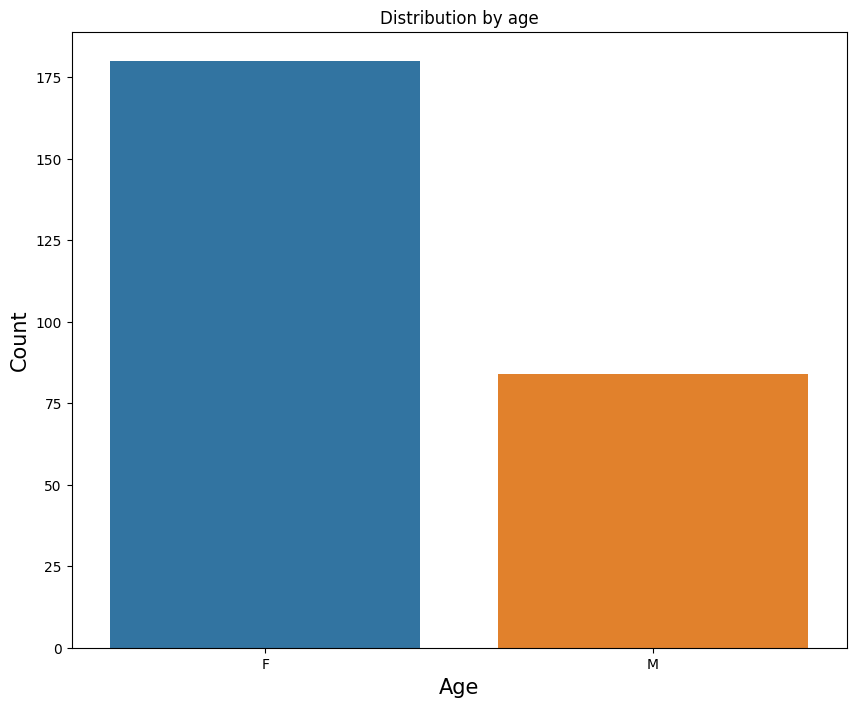

In [326]:
sex_p=MkPlot(sex)
sex_p.bar(x=h('B'), y='count', save_name='0-Sex', title='Distribution by age', **{'x_lbl':'Age', 'y_lbl':'Count'})

In [266]:
age=data.groupby(h('D'))['count'].sum().reset_index()
age.groupby(h('D')).sum()

,count
D-age,
0-14,3
15-24,24
25-64,196
>65,41


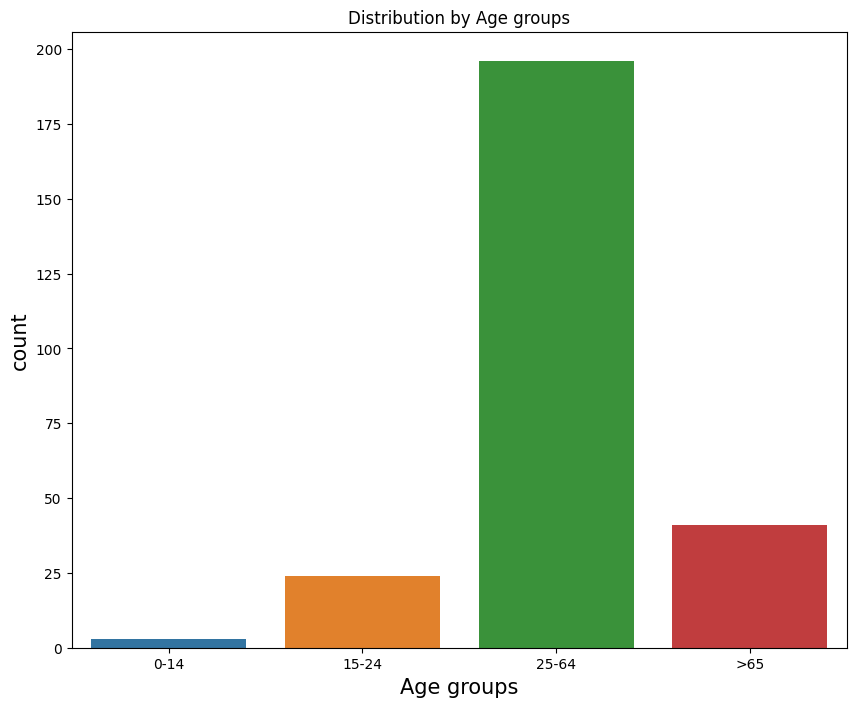

In [324]:
age_p=MkPlot(age)
age_p.bar(x=h('D'), save_name='0-Age', title='Distribution by Age groups', **{'x_lbl':'Age groups', 'y_lbl':'count'})

# E vs K

H0: Leaving from a place is not related to threatening event

H0': Choosing country to go is not related to threatening event



In [ ]:
h('C,E,K')

['C-leaved', 'E-country', 'K-threatening_event(death,sexual)']

In [ ]:
h.orig('C,E,K')

['Ви покинули місце проживання',
 "Вкажіть країну проживання на даний момент (не обов'язково)",
 'Ви переживали, були свідком або чули від близької вам людини (родини чи друга) про загрозливу подію? Приклади включають реальну смерть або загрозу смерті, серйозні травми або сексуальне насильство']

In [482]:
ek=data[h('C,E,K,count')]

First null hypothesis
H0: Leaving from a place is not related to threatening event

*People with threthening event have the same rate of leaving as people without such event

H1: threatening event is correlated to decision of leaving

In [475]:
ek.groupby(h('C,K'))['count'].sum()

C-leaved  K-threatening_event(death,sexual)
0         0.0                                   17
          1.0                                   53
1         0.0                                   36
          1.0                                  157
Name: count, dtype: int64

In [477]:
ek_cross=pd.crosstab(ek[h('C')], ek[h('K')])
ek_cross

"K-threatening_event(death,sexual)",0.0,1.0
C-leaved,,
0,17,53
1,36,157


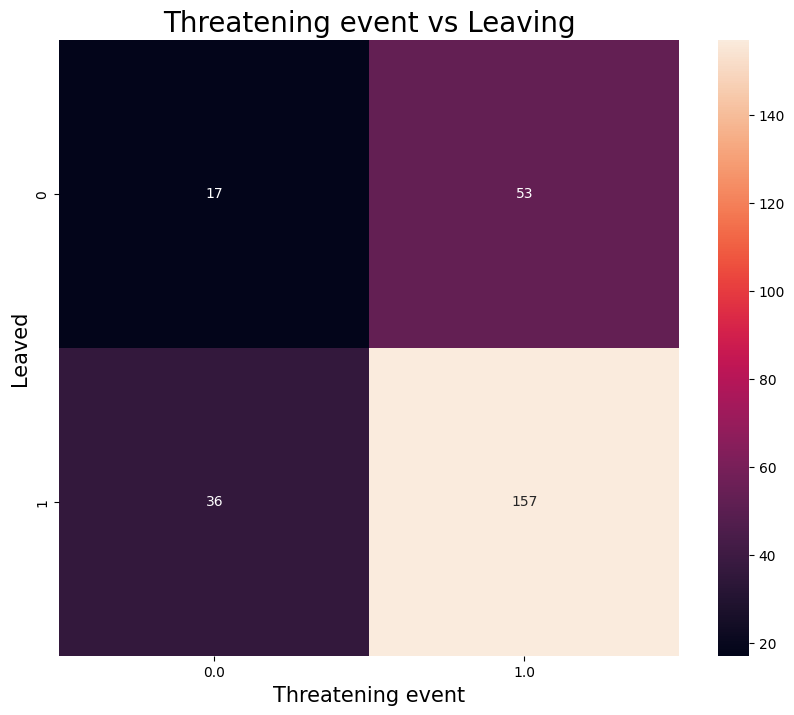

In [479]:
ek_plt=MkPlot(ek)
ek_plt.heat(ek_cross, save_name='EK_heatmap.png', title='Threatening event vs Leaving', **{'x_lbl':'Threatening event', 'y_lbl':'Leaved', 'fmt':'g'})

Frequency of people who lived a threatening event between those who leaved is 80,92%, and between those who ramained is 75,71%

In [17]:
ss.chi2_contingency(contigency)

(0.6931012849953742,
 0.40511151768027576,
 1,
 array([[ 14.10646388,  55.89353612],
        [ 38.89353612, 154.10646388]]))

In [ ]:
ss.fisher_exact(contigency)

(1.3610402855685875, 0.3885582919920145)

Null hypothesis: People with threthening event have the same rate of leaving as people without such event.

Parametric tests:
chi-square - p=0,45
fisher exact - p=0,38

Null hyphothesis can't be rejected, no evidence that living threatening event was decesive for leaving.



   ...

Second null hypothesis
Choosing country to go is not related to thretening event

regroup our data, by coding it's K and C

not-treat & not-leave 0 'T- L-'

not-treat & leave 01

treat & not-leave 10

treat & leave 11


In [ ]:
ek=ek.assign(code = lambda x: 'T- L-' if ((x[h('K')]==0) & (x[h('C')]==0)) else ('T- L+' if ((x[h('K')]==1) & (x[h('C')]==0)) else ('T+ L-' if ((x[h('K')]==0) & (x[h('C')]==1)) else 'T+ L+')))
#ek=ek.reset_index()#drop=True)
ek

In [493]:
ek=ek.assign(code= np.where( (ek[h('K')]==0) & (ek[h('C')]==0), 'T- L-', ek['code']))
ek=ek.assign(code= np.where( (ek[h('K')]==1) & (ek[h('C')]==0), 'T+ L-', ek['code']))
ek=ek.assign(code= np.where( (ek[h('K')]==0) & (ek[h('C')]==1), 'T- L+', ek['code']))
ek=ek.assign(code= np.where( (ek[h('K')]==1) & (ek[h('C')]==1), 'T+ L+', ek['code']))
ek

,C-leaved,E-country,"K-threatening_event(death,sexual)",count,code
0,0,Ukraine,1.0,1,T+ L-
1,1,Ukraine,1.0,1,T+ L+
2,0,Ukraine,1.0,1,T+ L-
3,1,Ukraine,1.0,1,T+ L+
4,1,Germany,1.0,1,T+ L+
...,...,...,...,...,...
260,1,Republic of Moldova,1.0,1,T+ L+
261,1,Ukraine,1.0,1,T+ L+
262,0,Ukraine,1.0,1,T+ L-
263,1,Ukraine,1.0,1,T+ L+


In [494]:
ek_full_cross = pd.crosstab(ek['code'], ek[h('E')])
ek_full_cross

E-country,Canada,Czech Republic,Germany,Great Britan,Hungary,Italy,Poland,Republic of Moldova,Romania,Slovakia,Sweden,Switzerland,Ukraine
code,,,,,,,,,,,,,
T+ L+,5,7,16,4,8,2,30,10,15,9,1,1,50
T+ L-,0,0,0,0,0,0,0,1,0,0,0,0,52
T- L+,0,5,4,0,1,1,6,0,5,1,1,0,12
T- L-,0,0,0,0,0,0,0,0,0,0,0,0,17


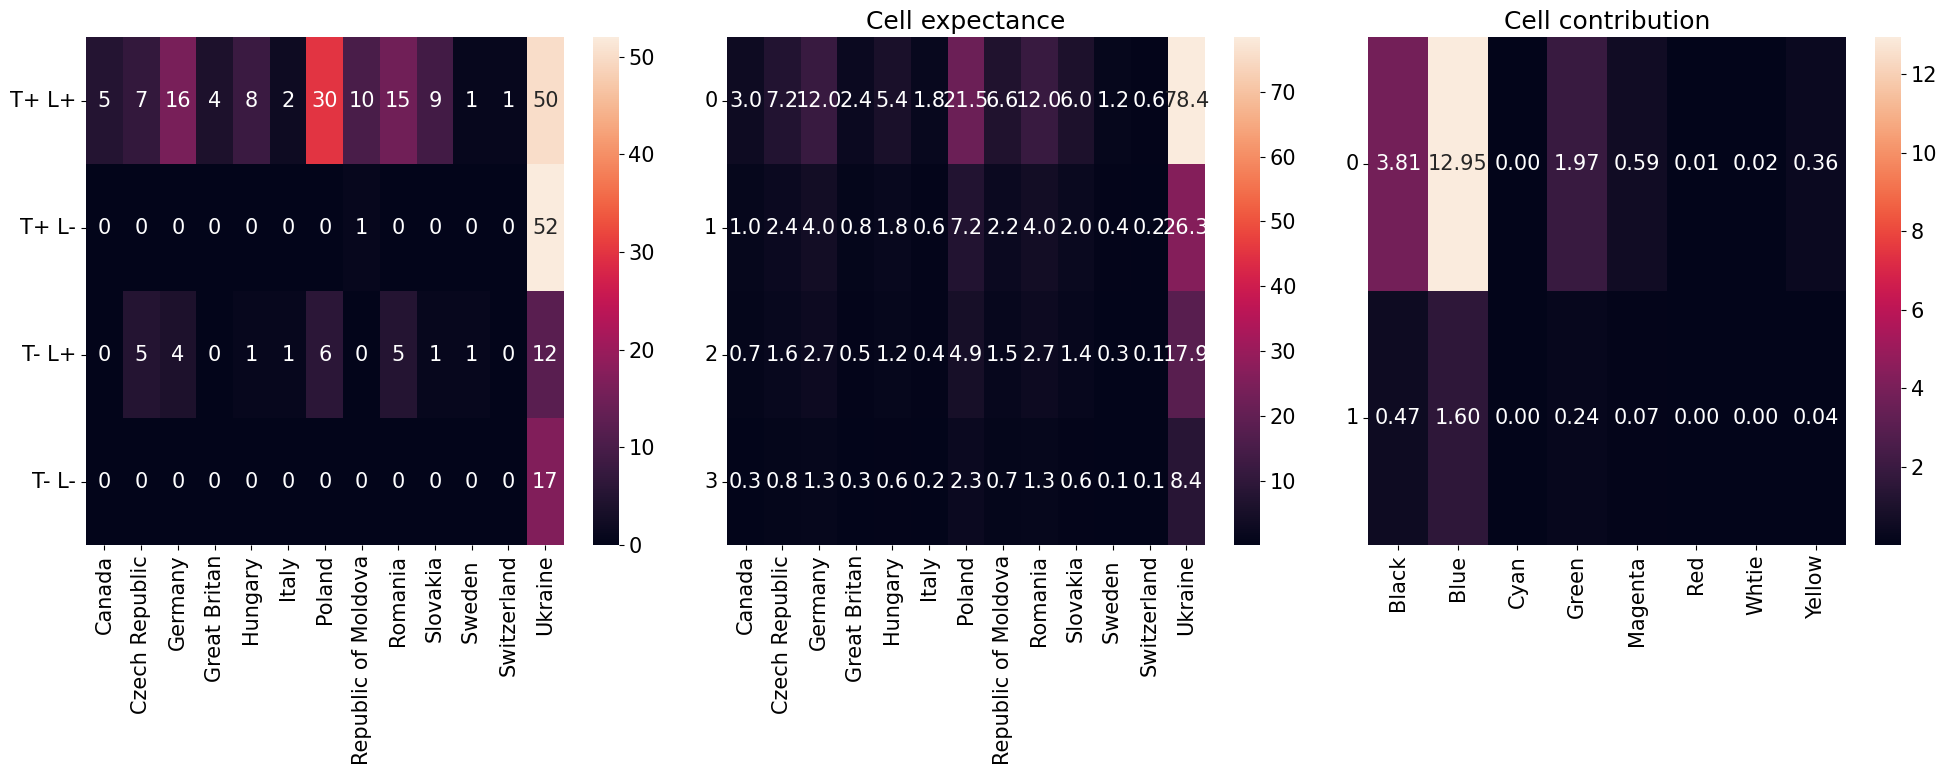

In [495]:
ek_plt.triple_heat(ek_full_cross)

there are insuficient data to analise country preferencies in leaving group.

Second:
Null hypothesis: There is no correlation of threatening event and country to go in.

~ Can compare leaved/not_leaved groups preferences of country to go, but need to drop countries with n<5

In [499]:
ek_leave_cross=pd.crosstab(ek[h('K')], ek[h('E')])
ek_leave_cross

E-country,Canada,Czech Republic,Germany,Great Britan,Hungary,Italy,Poland,Republic of Moldova,Romania,Slovakia,Sweden,Switzerland,Ukraine
"K-threatening_event(death,sexual)",,,,,,,,,,,,,
0.0,0,5,4,0,1,1,6,0,5,1,1,0,29
1.0,5,7,16,4,8,1,30,11,15,9,1,1,102


Need to drop all countires

# L vs S

N0: there is no connection between pain level in last 4 weeks and involuntary memories after threatening event 

H1: there is a connectin between pain level in last 4 weeks and involuntary memories after threatening event.

In [ ]:
h('L,S')

['L-involuntary_memories_after_thr_event', 'S-most_intense_pain_in_last_4wks']

In [ ]:
h.orig('L,S')

['Після того, як сталася ця подія, чи відчуваєте ви повторювані мимовільні спогади чи сни, які змушують вас страждати?',
 'Наскільки сильним був найсильніший біль за останні 4 тижні?']

In [500]:
ls=data[h('L,S')].dropna()
ls.head()

,L-involuntary_memories_after_thr_event,S-most_intense_pain_in_last_4wks
0,0.0,3
1,1.0,7
2,1.0,5
3,1.0,5
4,1.0,7


Null hypothesis

N0: there is no connection between pain level in last 4 weeks and involuntary memories after threatening event

H1: there is a connectin between pain level in last 4 weeks and involuntary memories after threatening event.

In [365]:
ls0=ls.loc[ls[h('L')]==0]
ls1=ls.loc[ls[h('L')]==1]
print (ls0[h('L')].describe(),'\n', ls0[h('S')].describe(),
       ls1[h('L')].describe(),'\n', ls1[h('S')].describe())

count     57.0
unique     1.0
top        0.0
freq      57.0
Name: L-involuntary_memories_after_thr_event, dtype: float64 
 count    57.000000
mean      5.859649
std       2.099648
min       0.000000
25%       5.000000
50%       6.000000
75%       7.000000
max       9.000000
Name: S-most_intense_pain_in_last_4wks, dtype: float64 count     204.0
unique      1.0
top         1.0
freq      204.0
Name: L-involuntary_memories_after_thr_event, dtype: float64 
 count    204.000000
mean       7.088235
std        1.372517
min        0.000000
25%        7.000000
50%        7.000000
75%        8.000000
max       10.000000
Name: S-most_intense_pain_in_last_4wks, dtype: float64


In [501]:
ls_plt=MkPlot(ls)

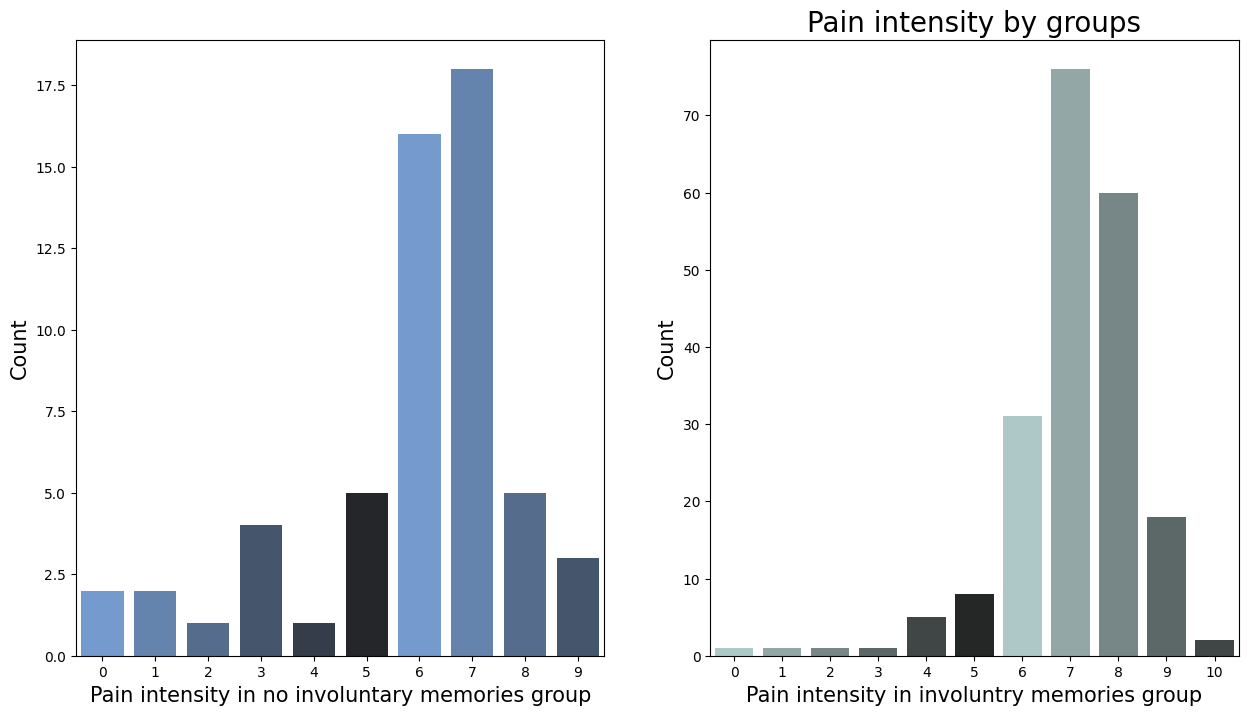

In [390]:
ls_plt.count_2(x=(ls0[h('S')], ls1[h('S')]),save_name='LS_by_groups', title='Pain intensity by groups', **{'x1_lbl':'Pain intensity in no involuntary memories group', 'x2_lbl':'Pain intensity in involuntry memories group', 'y_lbl':'Count'})

Data distribution is negatively skewed. 

Can be explained by high freqency of higher pain scores

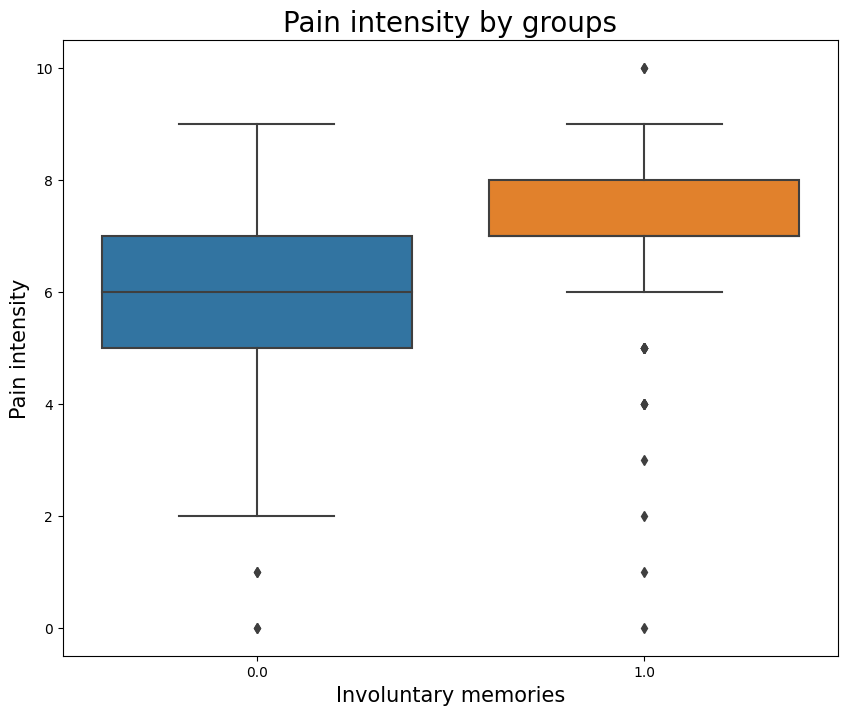

In [391]:
ls_plt.box(x=h('L'), y=h('S'), save_name='LS', title='Pain intensity by groups', **{'x_lbl':'Involuntary memories', 'y_lbl':'Pain intensity'})

a lot of outliners

N of groups give us possibility to drop them

In [387]:
ls0 = ls0.astype(CategoricalDtype(ordered=True))
ls1 = ls1.astype(CategoricalDtype(ordered=True))

In [388]:
#perform Shapiro-Wilk Test on Normally Distributed Data
ls0_shap, ls0_shap_p = ss.shapiro(ls0[h('S')])
ls1_shap, ls1_shap_p = ss.shapiro(ls1[h('S')])
print (ls0_shap, ls0_shap_p)
print (ls1_shap, ls1_shap_p)

0.8572841882705688 7.992657629074529e-06
0.8525103330612183 4.056764147698788e-13


shapiro-wilk test with p-value way below our alpha are not normally distributed

perform nonparametric Mann-Whitney U test

perform nonparametric Welch’s t-test, which does not assume equal population variance

In [63]:
ss.mannwhitneyu(ls0[h('S')], ls1[h('S')])

MannwhitneyuResult(statistic=3509.0, pvalue=2.1451907488084524e-06)

In [65]:
ss.ttest_ind(ls0[h('S')], ls1[h('S')], equal_var=False)

Ttest_indResult(statistic=-4.175465061206791, pvalue=8.443260240120812e-05)

H0 can be rejected.
There is statistical evidence of greater pain intensity score in population with involuntary memories/revocations about traumatic event

# AE vs H

H0: Behaviour changes due to illness or drugs are independent of concomitents diseases 


In [502]:
print (h('AE,H'))

['AE-can_new_behavior or thoughts_be_attributed_to_substance-disease', 'H-concomitents']


In [508]:
aeh = data[h('AE,H,count')].dropna()
aeh.head()

,AE-can_new_behavior or thoughts_be_attributed_to_substance-disease,H-concomitents,count
0,0,neural_disfunction,1
1,0,None,1
2,0,diabetis,1
3,1,None,1
4,1,locomotor,1


In [505]:
aeh.groupby(h('AE,H')).sum()

count
AE-can_new_behavior or thoughts_be_attributed_t... H-concomitents                
0                                                  HTA                         28
                                                   asthm                       10
                                                   coagulopathy                 1
                                                   copd                         1
                                                   cronic renal                 0
                                                   diabetis                    10
                                                   hepatic                      0
                                                   infectious                   0
                                                   locomotor                   11
                                                   neural_disfunction           5
                                                   neurological deficiency     11
                                                   oncological                 49
                                                   thyroid                      4
                                                   ulcer                        5
                                                   unstable angina              5
                                                   None                        28
1                                                  HTA                         13
                                                   asthm                        8
                                                   coagulopathy                 1
                                                   copd                         4
                                                   cronic renal                 2
                                                   diabetis                    15
                                                   hepatic                      3
                                                   infectious                   1
                                                   locomotor                    7
                                                   neural_disfunction           1
                                                   neurological deficiency      2
                                                   oncological                 17
                                                   thyroid                      7
                                                   ulcer                        3
                                                   unstable angina              7
                                                   None                         5

In [509]:
aeh=aeh.assign(comorb = np.where(aeh[h('H')]== 'None', 0.0, 1.0))
aeh.head()

,AE-can_new_behavior or thoughts_be_attributed_to_substance-disease,H-concomitents,count,comorb
0,0,neural_disfunction,1,1.0
1,0,None,1,0.0
2,0,diabetis,1,1.0
3,1,None,1,0.0
4,1,locomotor,1,1.0


In [510]:
aeh.groupby(['comorb', h('AE')])['count'].sum()

comorb  AE-can_new_behavior or thoughts_be_attributed_to_substance-disease
0.0     0                                                                      28
        1                                                                       5
1.0     0                                                                     140
        1                                                                      91
Name: count, dtype: int64

In [511]:
aeh_N=aeh[aeh[h('H')]=='None']
aeh_C=aeh[aeh[h('H')]!='None']

let's compare between people without concominents and all concomitents group

In [512]:
aeh_cross=pd.crosstab(aeh[h('AE')],aeh['comorb'])
aeh_cross

comorb,0.0,1.0
AE-can_new_behavior or thoughts_be_attributed_to_substance-disease,,
0,28,140
1,5,91


In [554]:
aeh_plt=MkPlot(aeh)

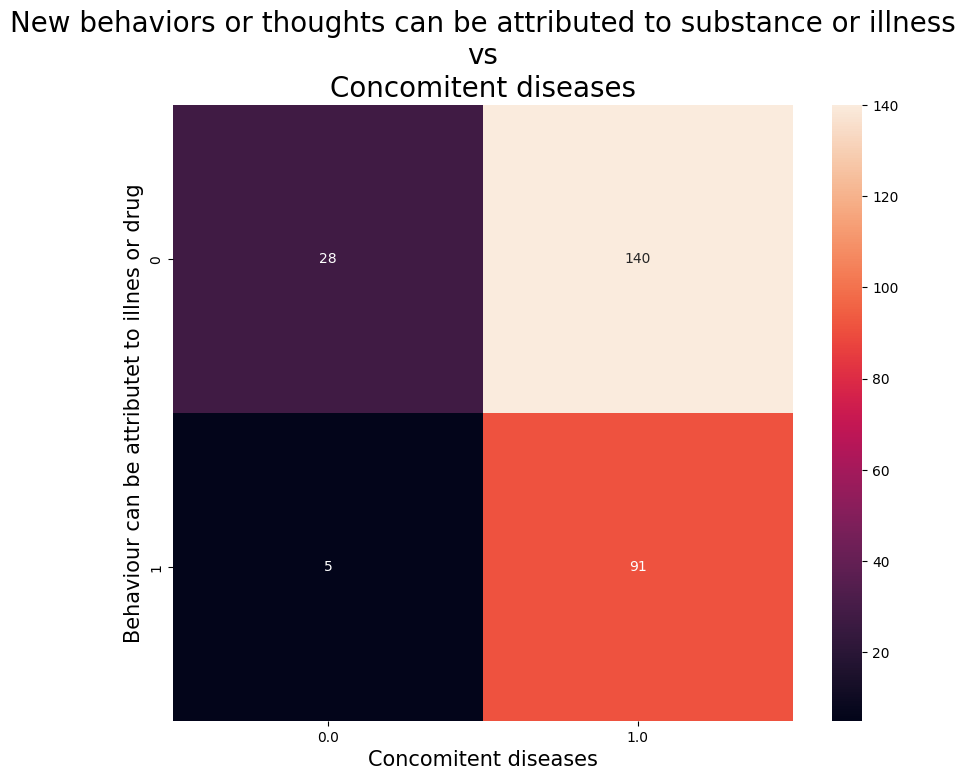

In [515]:
aeh_plt.heat(aeh_cross, save_name='AEH_', title='New behaviors or thoughts can be attributed to substance or illness\nvs\nConcomitent diseases', **{'x_lbl':'Concomitent diseases', 'y_lbl':'Behaviour can be attributet to illnes or drug', 'fmt':'g'})

In [516]:
ss.fisher_exact(aeh_cross)

(3.64, 0.006455133543965648)

In [517]:
ss.chi2_contingency(aeh_cross, correction=True)

(6.3231292517006805,
 0.011917314065668289,
 1,
 array([[ 21., 147.],
        [ 12.,  84.]]))

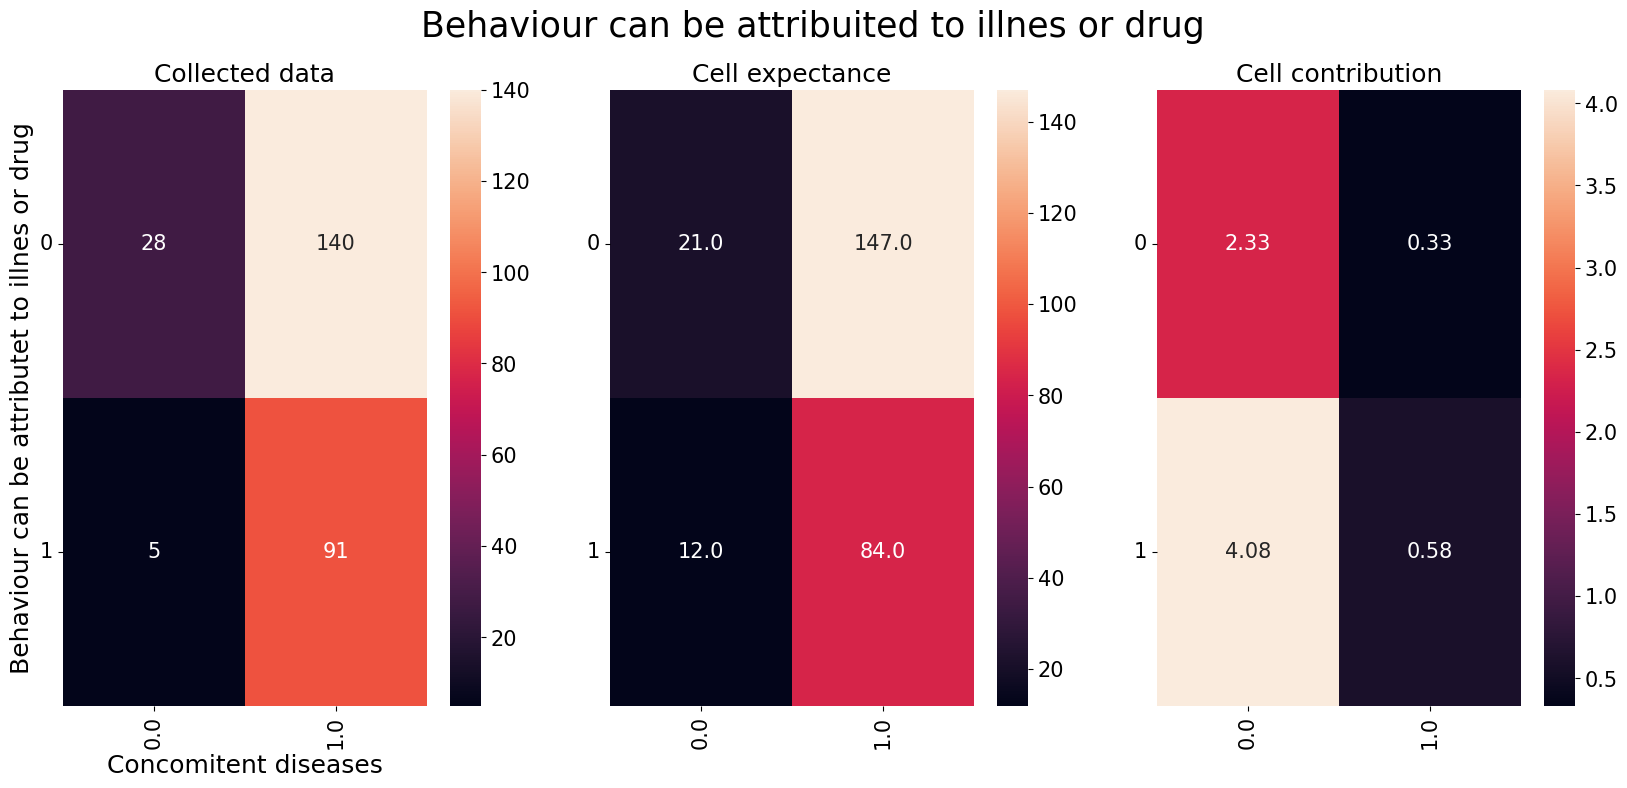

In [555]:
aeh_plt.triple_heat(aeh_cross, save_name='AEH_triple_', title='Behaviour can be attribuited to illnes or drug', **{'x_lbl':'Concomitent diseases', 'y_lbl':'Behaviour can be attributet to illnes or drug'})

In [ ]:
aeh_plt.heat(chi2_contribution(aeh_cross), save_name='AEH_contribution_', title='Cell contribution', **{'x_lbl':'Concomitent diseases', 'y_lbl':'Behaviour can be attributet to illnes or drug'})

People with behaviour that can be attribuited to illness or drug are less likly to not raport concomitent diseases.
People with concomitent deaseses are more likle to not correlate their behaviour to illness or drug. People without concomitant diseases are more likely not to raport behaviour that can be attribuited to illness or drugs.

People without comcomintent diseases are more likely not to relate their behaviour with illnes or drugs.

# E vs S

H0: Level of most intense pain in last 4 weeks is not related to current country.

In [ ]:
h('E,S')

['E-country', 'S-most_intense_pain_in_last_4wks']

In [556]:
es=data[h('E,S,count')].dropna()

In [579]:
es.groupby(h('E'))['count'].sum()

E-country
Canada                   5
Czech Republic          12
Germany                 20
Great Britan             4
Hungary                  9
Italy                    3
Poland                  36
Republic of Moldova     11
Romania                 20
Slovakia                10
Sweden                   2
Switzerland              1
Ukraine                131
Name: count, dtype: int64

In [557]:
es.groupby(h('E'))[h('S')].median()

E-country
Canada                 8.0
Czech Republic         7.0
Germany                7.5
Great Britan           8.0
Hungary                8.0
Italy                  7.0
Poland                 7.0
Republic of Moldova    7.0
Romania                7.0
Slovakia               7.5
Sweden                 7.0
Switzerland            7.0
Ukraine                7.0
Name: S-most_intense_pain_in_last_4wks, dtype: float64

In [561]:
for i in es[h('E')].unique():
  x=es.loc[es[h('E')] == i]
  print(f'''{i} \t median {x[h('S')].median()}, (IQR {q25(x[h('S')])}-{q75(x[h('S')])}), N={x[h('S')].count()}''')

Ukraine 	 median 7.0, (IQR 6.0-8.0), N=131
Germany 	 median 7.5, (IQR 7.0-8.0), N=20
Great Britan 	 median 8.0, (IQR 6.5-8.25), N=4
Poland 	 median 7.0, (IQR 6.75-7.0), N=36
Republic of Moldova 	 median 7.0, (IQR 5.5-8.5), N=11
Slovakia 	 median 7.5, (IQR 7.0-8.0), N=10
Romania 	 median 7.0, (IQR 6.0-8.0), N=20
Czech Republic 	 median 7.0, (IQR 7.0-8.25), N=12
Hungary 	 median 8.0, (IQR 7.0-8.0), N=9
Italy 	 median 7.0, (IQR 7.0-7.0), N=3
Canada 	 median 8.0, (IQR 8.0-8.0), N=5
Switzerland 	 median 7.0, (IQR 7.0-7.0), N=1
Sweden  	 median 7.0, (IQR 7.0-7.0), N=2


In [562]:
es_plt=MkPlot(es)

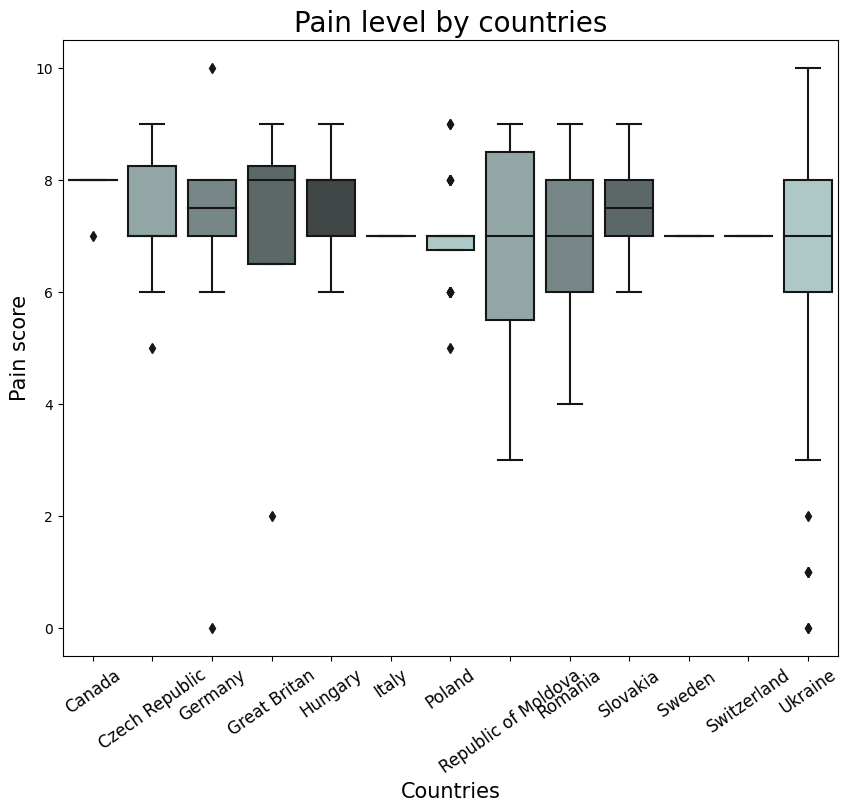

In [563]:
es_plt.box(x=h('E'), y=h('S'),save_name='ES_', title='Pain level by countries', **{'x_lbl':'Countries', 'y_lbl':'Pain score','rotate':35})

In [567]:
gr_cntr={}
for c in {n:e for n,e in enumerate(es[h('E')].unique())}.values():
  gr_cntr.update({c: pd.DataFrame(es.loc[es[h('E')]==c][h('S')]).astype('category')})

In [569]:
for k, df in gr_cntr.items():
  if (df[h('S')].count()>2):
    print(f"{k}:\t{ss.shapiro(df[h('S')])}, N={df[h('S')].count()}")
  else: print(f"{k}: N < 3")

Ukraine:	ShapiroResult(statistic=0.8580909371376038, pvalue=7.171879201628428e-10), N=131
Germany:	ShapiroResult(statistic=0.6695868372917175, pvalue=1.6979305655695498e-05), N=20
Great Britan:	ShapiroResult(statistic=0.7526593804359436, pvalue=0.04089093580842018), N=4
Poland:	ShapiroResult(statistic=0.8606494665145874, pvalue=0.0003379756526555866), N=36
Republic of Moldova:	ShapiroResult(statistic=0.9032314419746399, pvalue=0.20235760509967804), N=11
Slovakia:	ShapiroResult(statistic=0.9044356346130371, pvalue=0.24491257965564728), N=10
Romania:	ShapiroResult(statistic=0.9150409698486328, pvalue=0.07956717908382416), N=20
Czech Republic:	ShapiroResult(statistic=0.902725338935852, pvalue=0.17199546098709106), N=12
Hungary:	ShapiroResult(statistic=0.9130674004554749, pvalue=0.3379381000995636), N=9
Italy:	ShapiroResult(statistic=1.0, pvalue=1.0), N=3
Canada:	ShapiroResult(statistic=0.5521818399429321, pvalue=0.00013097876217216253), N=5
Switzerland: N < 3
Sweden : N < 3


Kruskal on data from all countries

In [570]:
ss.kruskal(*(df[h('S')] for df in gr_cntr.values()))

KruskalResult(statistic=17.780609239983807, pvalue=0.12251617448893619)

Kruskal for countries with more then 5 respondents

In [571]:
ss.kruskal(*(df[h('S')] for df in gr_cntr.values() if df[h('S')].count()>5))

KruskalResult(statistic=13.14510490437705, pvalue=0.0686508771626892)

Kruskal for n of 5 and more

In [572]:
ss.kruskal(*(df[h('S')] for df in gr_cntr.values() if df[h('S')].count()>5))

KruskalResult(statistic=13.14510490437705, pvalue=0.0686508771626892)

In [573]:
#list of countries with N>=5
repr_c=[k for k, df in gr_cntr.items() if df[h('S')].count()>=5]
repr_c

['Ukraine',
 'Germany',
 'Poland',
 'Republic of Moldova',
 'Slovakia',
 'Romania',
 'Czech Republic',
 'Hungary',
 'Canada']

Perform pair-to-pain MannWhittney U test, select only with p<0.05

In [575]:
from itertools import combinations
comb=[c for c in tuple(combinations(repr_c, 2))]

In [576]:
semnif=set()
for c1,c2 in comb:
  stat,p=ss.mannwhitneyu(gr_cntr[c1][h('S')],gr_cntr[c2][h('S')])
  if p<0.05:
    print (f'pval={p:.4f} {c1}, {c2}')
    semnif.add(c1)
    semnif.add(c2)
semnif

pval=0.0493 Ukraine, Germany
pval=0.0370 Ukraine, Slovakia
pval=0.0478 Ukraine, Hungary
pval=0.0349 Ukraine, Canada
pval=0.0184 Poland, Canada


{'Canada', 'Germany', 'Hungary', 'Poland', 'Slovakia', 'Ukraine'}

In [577]:
for i in semnif:
    x=es.loc[es[h('E')] == i]
    print(f'''{i}  median {x[h('S')].median()} (IQR {q25(x[h('S')])}-{q75(x[h('S')])}), N={x[h('S')].count()}''')
    df[i]=x[h('S')]

Canada  median 8.0 (IQR 8.0-8.0), N=5
Ukraine  median 7.0 (IQR 6.0-8.0), N=131
Poland  median 7.0 (IQR 6.75-7.0), N=36
Germany  median 7.5 (IQR 7.0-8.0), N=20
Hungary  median 8.0 (IQR 7.0-8.0), N=9
Slovakia  median 7.5 (IQR 7.0-8.0), N=10


In [578]:
es=es.astype({h('S'):'category'})

In [579]:
num_gr={k: df.to_numpy().reshape(-1) for k, df in gr_cntr.items() if k in semnif}

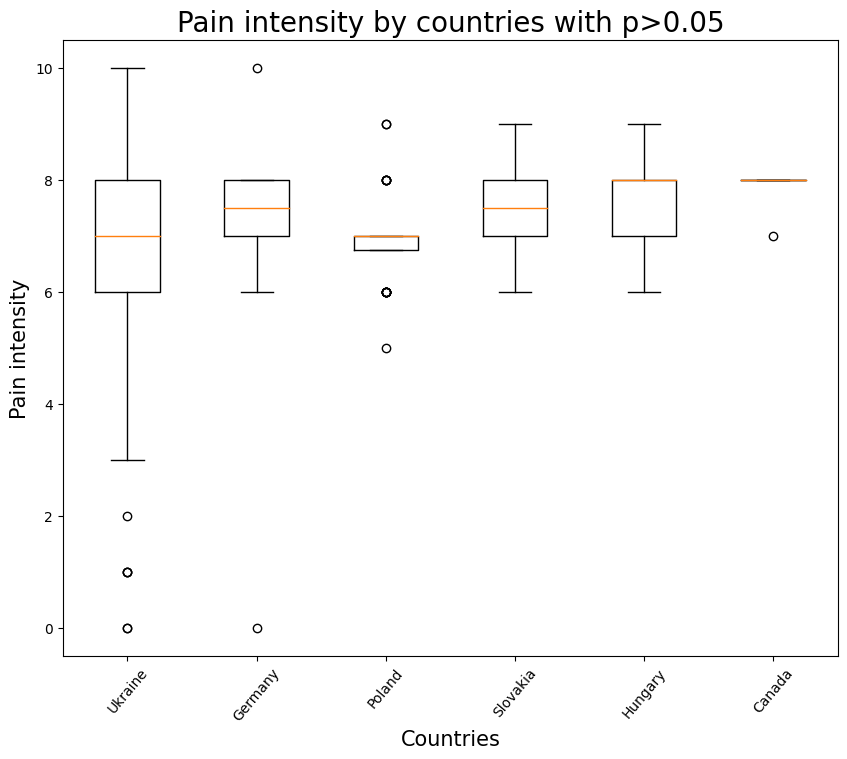

In [742]:
fig, ax = plt.subplots(1,1, figsize=(10,8))

ax.boxplot(num_gr.values())
ax.set_xticklabels(num_gr.keys(), fontsize=12)
#ax.imshow(sns.dark_palette("#acc", reverse=True))

plt.xticks(fontsize=10, rotation=50)
plt.title('Pain intensity by countries with p>0.05', fontsize=20)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Pain intensity', fontsize=15)

plt.show()
fig.savefig(path+'ES_semnificative_boxplot.png')

H0 can be rejected if we drop countries with n of respondents <5

pval=0.0493 Ukraine, Germany

pval=0.0370 Ukraine, Slovakia

pval=0.0478 Ukraine, Hungary

pval=0.0349 Ukraine, Canada

pval=0.0184 Poland, Canada


Germany  N 20, median 7.5, q25 7.0, q75 8.0

Canada  N 5, median 8.0, q25 8.0, q75 8.0

Hungary  N 9, median 8.0, q25 7.0, q75 8.0

Slovakia  N 10, median 7.5, q25 7.0, q75 8.0

Poland  N 36, median 7.0, q25 6.75, q75 7.0

Ukraine  N 131, median 7.0, q25 6.0, q75 8.0


With 95% of confidence we can assume that level of pain raported in Ukraine(median 7.0, q25 6.0, q75 8.0) is lower then pain intensity raported in Germany (median 7.5, q25 7.0, q75 8.0), Slovakia (median 7.5, q25 7.0, q75 8.0), Hungary (median 8.0, q25 7.0, q75 8.0), Canada (8.0, q25 8.0, q75 8.0)

Also we can assume with 95% of confidence that levels of pain raported in Poland(median 7.0, q25 6.75, q75 7.0) is lower than pain intensity raported in Canada (8.0, q25 8.0, q75 8.0).

During analysis with strict condition of n>5 there was no statistical difference. Seems that The most score for difference in distribution is due to Canada ((7,8,8,8,8) points for pain in 5 respondents)

# AA vs S

H0: There is no difference in most intense pain in last 4 week in between people with more self-destructive behaviour and not.

Try linear regression
find cutoff value in pain score for correlation to self-destructive


In [ ]:
h('AA,S')

['AA-more_self_destructive', 'S-most_intense_pain_in_last_4wks']

In [ ]:
h.orig('AA,S')

['Ви більше саморуйнуєтесь?',
 'Наскільки сильним був найсильніший біль за останні 4 тижні?']

In [581]:
aas=data[h('AA,S,count')].dropna()

H0: Pain intensity in last 4 wks is not related to self destructive behavior 

In [582]:
aas.groupby(h('AA'))[h('S')].median()

AA-more_self_destructive
0.0    7.0
1.0    7.0
Name: S-most_intense_pain_in_last_4wks, dtype: float64

In [583]:
aas0=aas.loc[aas[h('AA')]==0]
aas1=aas.loc[aas[h('AA')]==1]

In [603]:
aas_plt=MkPlot(aas)

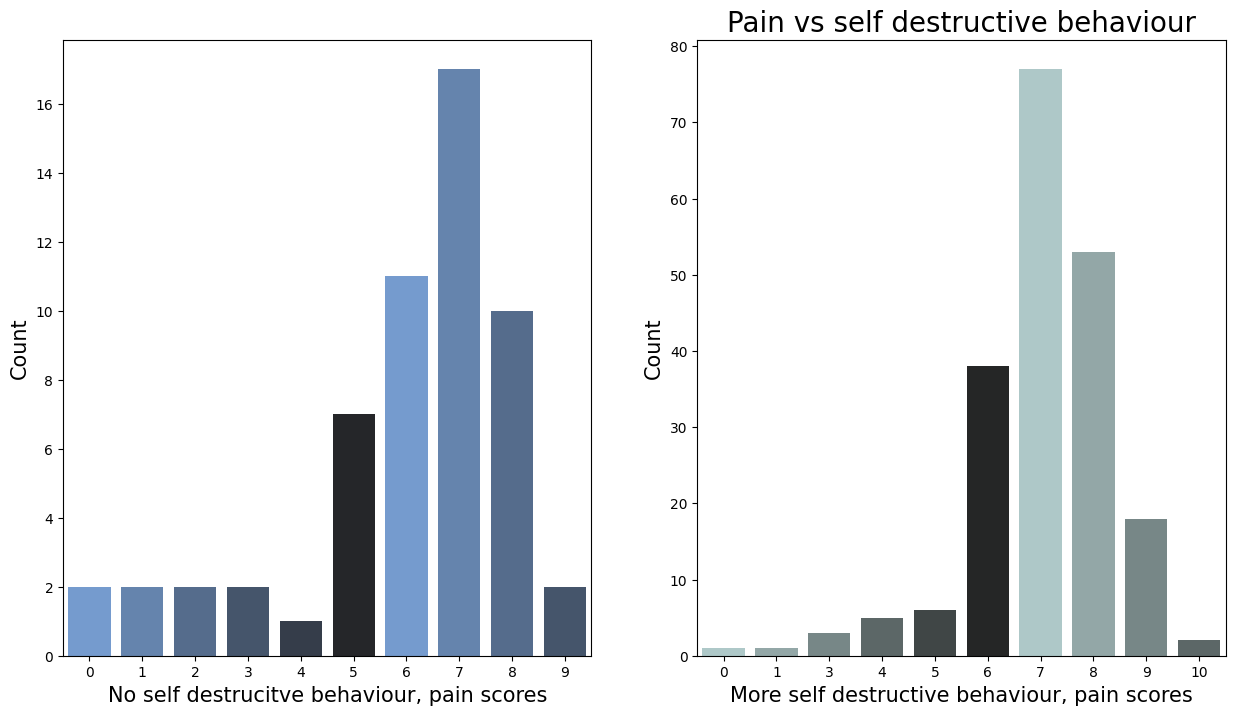

In [585]:
aas_plt.count_2(x=(aas0[h('S')], aas1[h('S')]), save_name='AAS_', title='Pain vs self destructive behaviour', **{'x1_lbl':'No self destrucitve behaviour, pain scores', 'x2_lbl':'More self destructive behaviour, pain scores', 'y_lbl':'Count'})

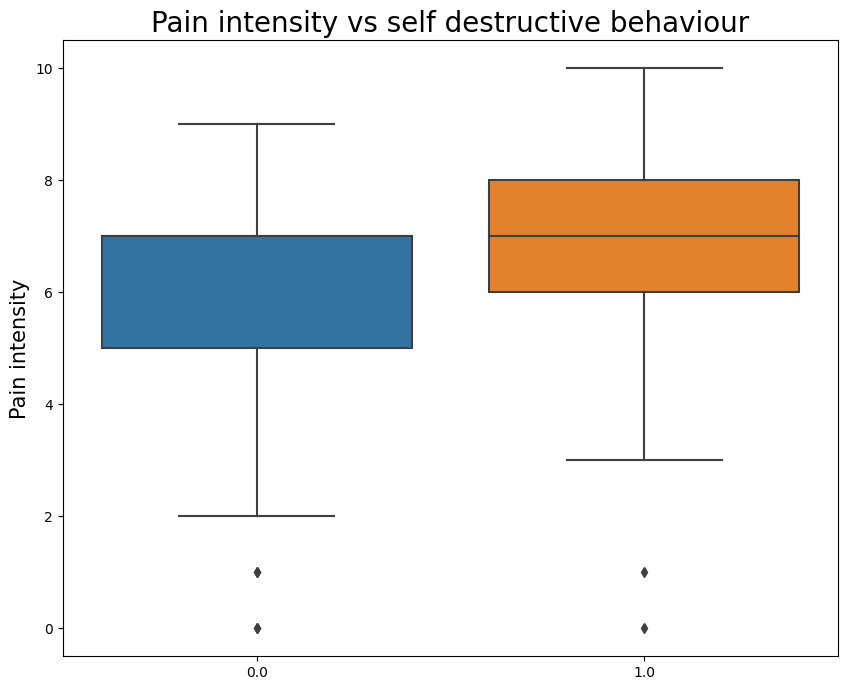

In [604]:
aas_plt.box(x=h('AA'), y=h('S'), save_name='AAS_', title='Pain intensity vs self destructive behaviour', **{'x_lbdl':'Self destructive behaviour', 'y_lbl':'Pain intensity','palette':'std'})

In [ ]:
ss.shapiro(aas0[h('S')])

ShapiroResult(statistic=0.8495848774909973, pvalue=4.764961886394303e-06)

In [ ]:
ss.shapiro(aas1[h('S')])

ShapiroResult(statistic=0.8638421893119812, pvalue=1.5282558205043095e-12)

In [589]:
ss.mannwhitneyu(aas0[h('S')], aas1[h('S')])

MannwhitneyuResult(statistic=4032.0, pvalue=0.0004803162273293553)

pvalue=0.00048
reject H0
population with behaviour become more self destructive is more probably to have higher pain level in last 4wks

# E vs G

H0: There is the same probability to persons with diffent chronic diseases to enter the certanin country

H0: There is no correlation between country and chronic disease

People with chronic diseases have same probability of current country

"Вкажіть країну проживання на даний момент (не обов'язково)", 'Діагноз з привiду хронічного болю'


In [590]:
eg=data[h('E,G,count')].dropna()

In [738]:
print(eg[h('G')].unique())

['0', 'Neuropathic pain', 'Chronic visceral pain', 'Chronic low back pain', 'Cancer pain', 'Headache', 'Fibromyalgia', 'musculosceletal pain']
Categories (8, object): ['0', 'Cancer pain', 'Chronic low back pain', 'Chronic visceral pain', 'Fibromyalgia', 'Headache', 'Neuropathic pain', 'musculosceletal pain']


H0: there is no correlation between current country and diagnosis

In [592]:
eg.groupby(h('E,G'))['count'].sum()

E-country  G-diagnosis          
Canada     0                         0
           Cancer pain               0
           Chronic low back pain     3
           Chronic visceral pain     0
           Fibromyalgia              0
                                    ..
Ukraine    Chronic visceral pain     3
           Fibromyalgia              4
           Headache                  6
           Neuropathic pain          8
           musculosceletal pain     29
Name: count, Length: 104, dtype: int64

In [594]:
eg.groupby(h('G,E'))['count'].sum()

G-diagnosis           E-country     
0                     Canada             0
                      Czech Republic     0
                      Germany            2
                      Great Britan       1
                      Hungary            0
                                        ..
musculosceletal pain  Romania            5
                      Slovakia           3
                      Sweden             0
                      Switzerland        0
                      Ukraine           29
Name: count, Length: 104, dtype: int64

In [595]:
eg=eg.assign(comorb= np.where(eg[h('G')]=='0', 0, 1))

In [596]:
eg_cross=pd.crosstab(eg[h('E')], eg['comorb'])
eg_cross

comorb,0,1
E-country,,
Canada,0,5
Czech Republic,0,12
Germany,2,18
Great Britan,1,3
Hungary,0,9
Italy,0,3
Poland,1,35
Republic of Moldova,1,10
Romania,1,19


Due to lack of data in country groups chi2 analysis is not possible. Considered to group countries in 2 major groups: Ukraine and Other.

In [597]:
eg=eg.assign(country_code=np.where(eg[h('E')]=='Ukraine', 'Ukraine', 'Other'))

In [598]:
eg_red_cross=pd.crosstab(eg['country_code'], eg['comorb'])
eg_red_cross

comorb,0,1
country_code,,
Other,6,127
Ukraine,23,108


In [611]:
eg_plt=MkPlot(eg)

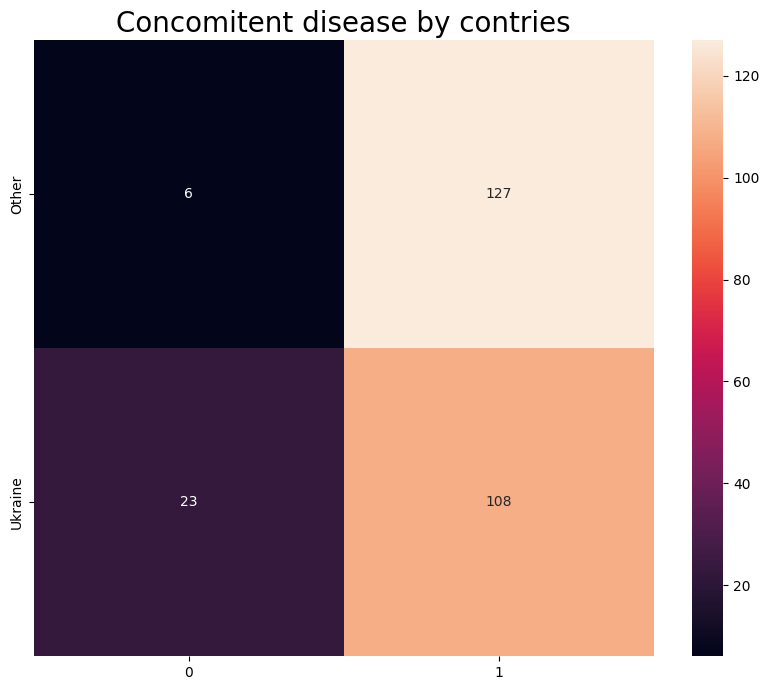

In [606]:
eg_plt.heat(eg_red_cross, title='Concomitent disease by contries', **{'fmt':'g'})

In [967]:
ss.fisher_exact(eg_red_cross)

(0.2218418349880178, 0.0007025943466622408)

In [968]:
ss.chi2_contingency(eg_red_cross)

(10.191743021564035,
 0.0014107090548747558,
 1,
 array([[ 14.60984848, 118.39015152],
        [ 14.39015152, 116.60984848]]))

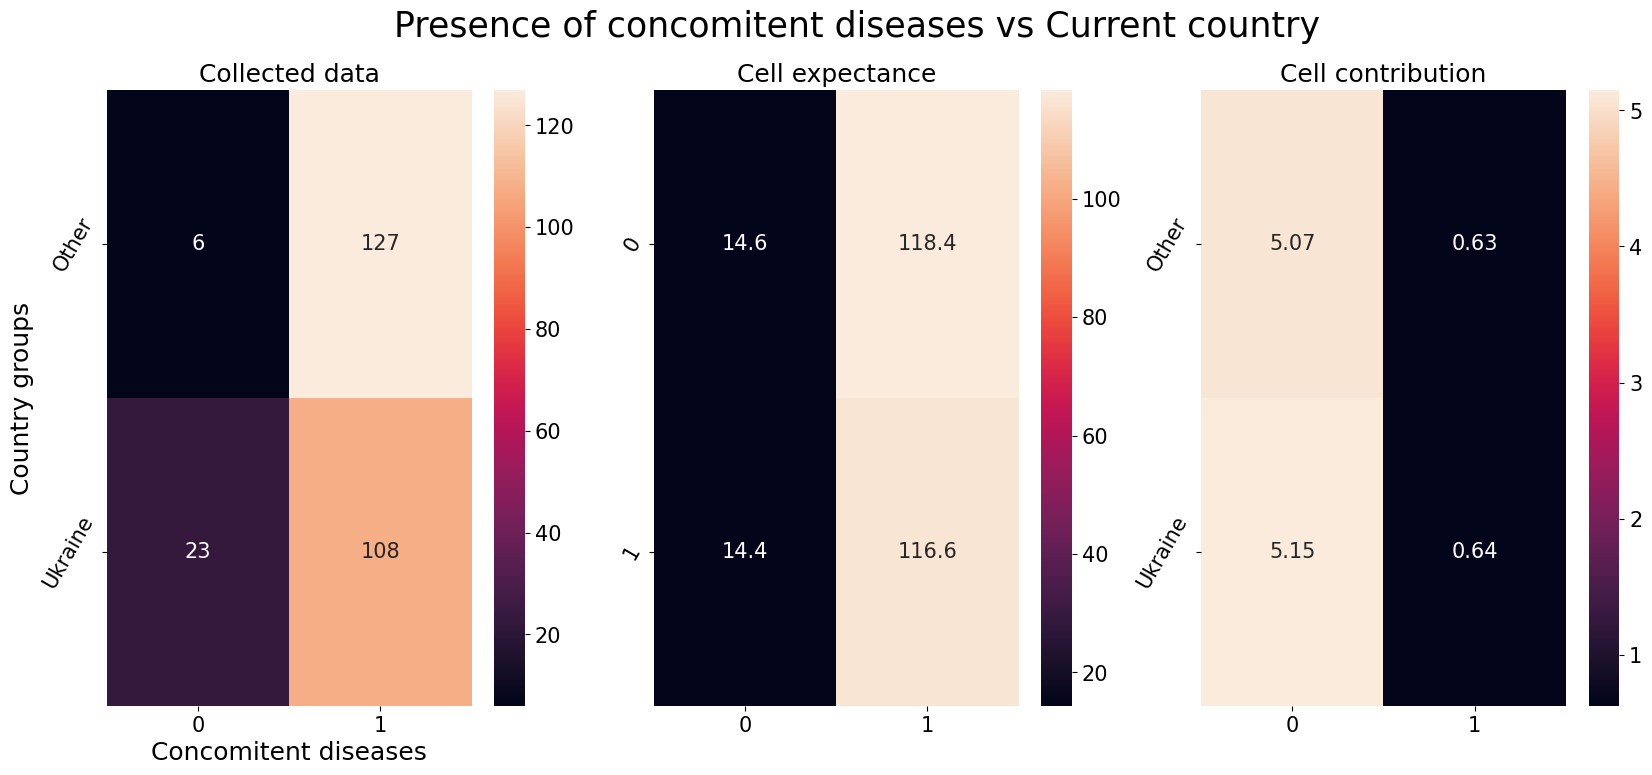

In [613]:
eg_plt.triple_heat(eg_red_cross, save_name='EG_triple', title='Presence of concomitent diseases vs Current country', **{'x_lbl':'Concomitent diseases', 'y_lbl':'Country groups', 'x_rotate':0, 'y_rotate':60}) 

H0 can be rejected: There is more probability people without comorbidites to stay ukraine(79,31% vs 45,96%)

There is less probability to be living in Other country in group without comorbidites. 

Somne tendencies. Can't be confirmed due to lack of data to perform statistical tests.

Peoples without concomitent diseases are more likly to go to Germany (33,33 vs 14,17), Great Britan(16,67 vs 2.36)

People with comorbidites are more likely to go to Czech Republic, Slovakia, Hungary, Canada, Republic of Moldova, Poland. 


In [614]:
eg_r=eg.loc[eg[h('E')]!='Ukraine']

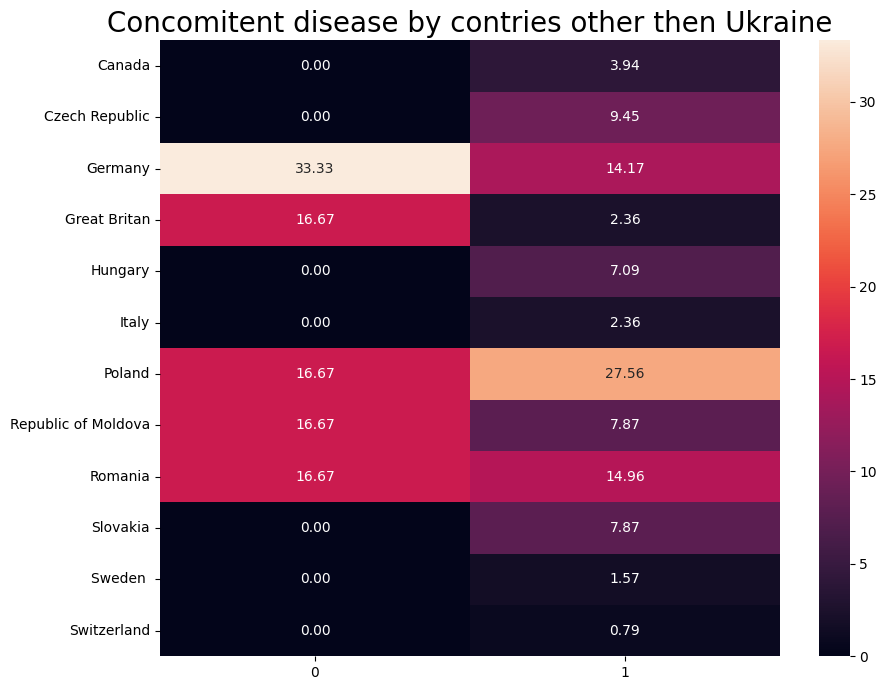

In [616]:
eg_cross=pd.crosstab(eg_r[h('E')], eg['comorb'], normalize='columns').apply(lambda x:x*100)
eg_plt.heat(eg_cross, title='Concomitent disease by contries other then Ukraine', **{'fmt':'.2f'})

H0 there is no corelation between comorbidites and country

# J vs S

H0: There is no correlation between favorit colour and most intense pain raported in last 4 weeks

In [ ]:
h('J,S')

['J-favorit_colour', 'S-most_intense_pain_in_last_4wks']

In [617]:
js=data[h('J,S,count')].dropna()

In [618]:
js.groupby(h('J'))[h('S')].median()

J-favorit_colour
Black      5.0
Blue       7.0
Cyan       7.0
Green      7.0
Magenta    7.0
Red        7.0
Whtie      8.0
Yellow     7.0
Name: S-most_intense_pain_in_last_4wks, dtype: float64

In [619]:
js.groupby(h('J'))[h('S')].agg(pd.Series.mode)

J-favorit_colour
Black      5
Blue       8
Cyan       7
Green      7
Magenta    7
Red        7
Whtie      8
Yellow     7
Name: S-most_intense_pain_in_last_4wks, dtype: int64

In [620]:
js_plt=MkPlot(js)

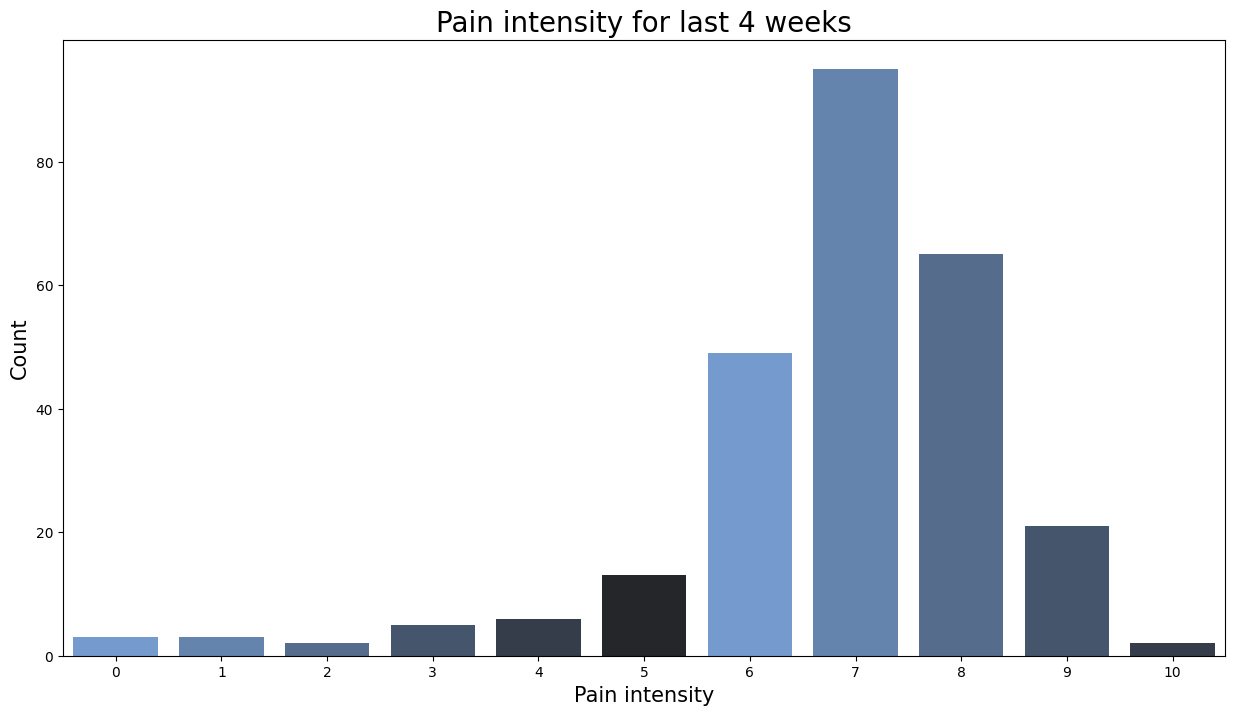

In [621]:
js_plt.count_1(x=h('S'), save_name='JS_', title='Pain intensity for last 4 weeks', **{'x_lbl':'Pain intensity', 'y_lbl':'Count'})

In [ ]:
js[h('J')].unique()

['Blue', 'Whtie', 'Black', 'Yellow', 'Green', 'Red', 'Magenta', 'Cyan']
Categories (8, object): ['Black', 'Blue', 'Cyan', 'Green', 'Magenta', 'Red', 'Whtie', 'Yellow']

In [622]:
colours = {'Black':'k', 'Blue':'b', 'Cyan':'c', 'Green':'g', 'Magenta':'m', 'Red':'r', 'Whtie':'w', 'Yellow':'y'}

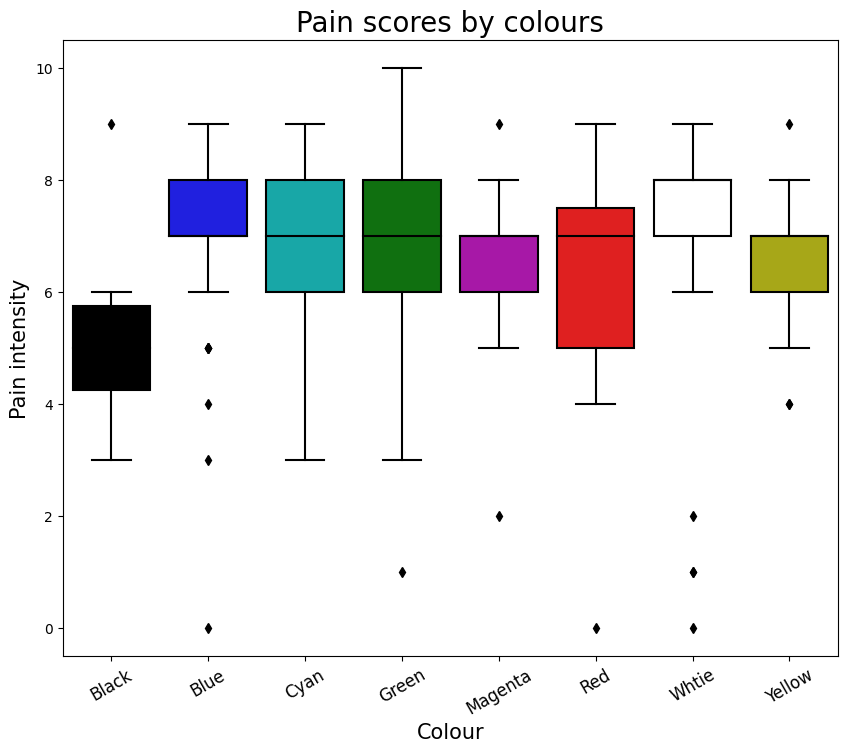

In [410]:
fig, ax =plt.subplots(1,1, figsize=(10,8))
b=sns.boxplot(x=h('J'), y=h('S'), data=js, palette=colours)
b.set_ylabel("Pain intensity", fontsize=15)
b.set_xlabel("Colour", fontsize=15)
plt.xticks(fontsize=12, rotation=30)
plt.title('Pain scores by colours', fontsize=20)
fig.savefig(path+"JS_boxplot.png")


In [623]:
gr_list={}
for clr in colours.keys():
  gr_list.update({clr: pd.DataFrame(js.loc[js[h('J')]==clr][h('S')])})

In [ ]:
for k, g in gr_list.items():
  print(f"{k}:\t{ss.shapiro(g[h('S')])}, N={g[h('S')].count()}")

Black:	ShapiroResult(statistic=0.9154589176177979, pvalue=0.4732707142829895), N=6
Blue:	ShapiroResult(statistic=0.7927588224411011, pvalue=1.8280282176874607e-08), N=69
Cyan:	ShapiroResult(statistic=0.8592002987861633, pvalue=0.00012712579336948693), N=41
Green:	ShapiroResult(statistic=0.8896927833557129, pvalue=0.0018046661280095577), N=36
Magenta:	ShapiroResult(statistic=0.8329897522926331, pvalue=1.3751578990195412e-05), N=45
Red:	ShapiroResult(statistic=0.8750019073486328, pvalue=0.08985479176044464), N=11
Whtie:	ShapiroResult(statistic=0.6865742206573486, pvalue=3.0830111086288525e-07), N=34
Yellow:	ShapiroResult(statistic=0.9050673246383667, pvalue=0.03758733719587326), N=22


only black colour pain intensity seems to be normaly distributed (Shapiro test statistics: 0.9154, p=0.473), but N=6, best analised by non-parametric tests.

In [624]:
ss.kruskal(*(df[h('S')] for df in gr_list.values()))

KruskalResult(statistic=22.134123239946245, pvalue=0.002408609671941744)

there is some statistical difference between pain levels in colour groups.

Needs futher analysis to say which groups are different

Number of paired colours combinations is 28


In [778]:
from itertools import combinations
comb=[c for c in tuple(combinations(colours.keys(), 2))]


Perform mann-whitney U test on every pair, select only with p less then alpha=0.05

In [ ]:
for c1,c2 in comb:
  stat,p=ss.mannwhitneyu(gr_list[c1][h('S')],gr_list[c2][h('S')])
  if p<0.05:
    print (p,c1,c2)

0.020398864122136758 Black Blue
0.01510515843358607 Black Cyan
0.04365481911778225 Black Green
0.03046866761082626 Black Magenta
0.002864807752183911 Blue Magenta
0.01345597505662753 Blue Yellow
0.0382436872922276 Cyan Magenta
0.0016453269628873778 Magenta Whtie
0.008852838456962121 Whtie Yellow


In [ ]:
from itertools import count
clrs=[]
for c1,c2 in comb:
  stat,p=ss.mannwhitneyu(gr_list[c1][h('S')],gr_list[c2][h('S')])
  if p<0.05:
    clrs.append(c1)
    clrs.append(c2)

In [ ]:
for c in colours.keys():
  print(c, clrs.count(c))

Black 4
Blue 3
Cyan 2
Green 1
Magenta 4
Red 0
Whtie 2
Yellow 2


there are 9 pairs of colour we can reject H0

6 pairs to reject H0

In both tests black colour is the most frequent colour to reject H0 in paired test

Let's drop black group and perform one more kruskal test

In [ ]:
ss.kruskal(*(gr_list[k][h('S')] for k in gr_list.keys() if k not in ['Black','Magenta'] ))

KruskalResult(statistic=10.046482198580003, pvalue=0.07392885627864543)

In [ ]:
ss.kruskal(*(gr_list[k][h('S')] for k in gr_list.keys() if k not in ['Magenta'] ))

KruskalResult(statistic=14.699075889375873, pvalue=0.022730890448470945)

In [ ]:
ss.kruskal(*(gr_list[k][h('S')] for k in gr_list.keys() if k not in ['Black'] ))

KruskalResult(statistic=17.719460453413507, pvalue=0.006972888065007035)

0.0064 Blue Magenta
0.0017 Magenta Whtie
0.0160 Whtie Yellow
0.0028 Blue Magenta
0.0134 Blue Yellow
0.0382 Cyan Magenta
0.0010 Magenta Whtie
0.0067 Whtie Yellow


p<0.05 - can reject H0 

seems that the most difference in produced by black and Magenta colour group

Conclusion: people who prefered black colour seems to raport lower pain levels compared to people who prefered (blue, cyan, white, green, magenta)



# D vs G

H0: there is no correlation between age and diagnosis related to chronic pain

In [625]:
h('D,G')

['D-age', 'G-diagnosis']

In [626]:
dg = data[h('D,G,count')].dropna()

In [627]:
dg.groupby(h('D'))['count'].sum()

D-age
0-14       3
15-24     24
25-64    196
>65       41
Name: count, dtype: int64

In [628]:
dg[h("G")].unique()

['0', 'Neuropathic pain', 'Chronic visceral pain', 'Chronic low back pain', 'Cancer pain', 'Headache', 'Fibromyalgia', 'musculosceletal pain']
Categories (8, object): ['0', 'Cancer pain', 'Chronic low back pain', 'Chronic visceral pain', 'Fibromyalgia', 'Headache', 'Neuropathic pain', 'musculosceletal pain']

In [629]:
dg=dg.assign(diagnosis = np.where( dg[ h[ 'G']]!='0', 'Yes', 'No'))

In [632]:
dg_cross=pd.crosstab(dg[h('D')], dg['diagnosis'])
dg_cross

diagnosis,No,Yes
D-age,,
0-14,0,3
15-24,3,21
25-64,24,172
>65,2,39


0-14 group N < 5, with 0 presented concomitent diseases. Due to low influence and lack of data we droped this group from futher analysis. Would be wrong to group pediatric population with young adult. 

In [630]:
dg_red_cross=dg_cont.iloc[1:,:]
dg_red_cross

diagnosis,No,Yes
D-age,,
15-24,3,21
25-64,24,172
>65,2,39


In [631]:
dg_plt=MkPlot(dg)

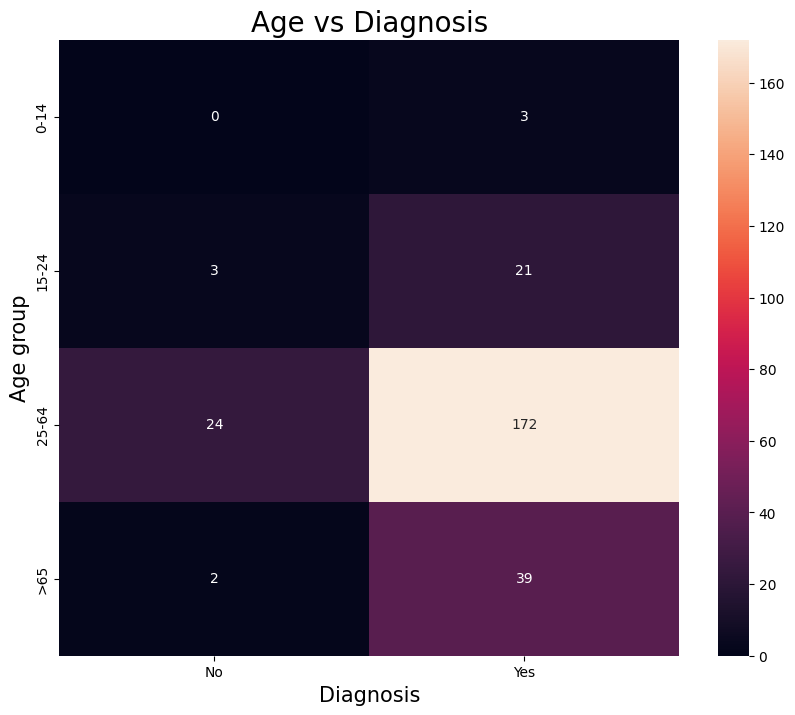

In [633]:
dg_plt.heat(dg_cross, save_name='DG_', title='Age vs Diagnosis', **{'x_lbl':'Diagnosis', 'y_lbl':'Age group', 'fmt':'g'})

In [103]:
ss.chi2_contingency(dg_red_cross, correction=True)

(1.914781918865107,
 0.3838931733753903,
 2,
 array([[  2.66666667,  21.33333333],
        [ 21.77777778, 174.22222222],
        [  4.55555556,  36.44444444]]))

Low quality test, there are few respondents.
In respondend population the correlation between age group and presence of a diagnosis. There is a prevalence of presence of a diagnosis in all 3 groups. 

# D vs H

H0: There is no correlation between age and concomitent diseases

In [458]:
h('D,H')

['D-age', 'H-concomitents']

In [635]:
dh=data[h('D,H,count')].dropna()

In [636]:
dh.groupby(h('D,H'))[h('count')].sum()

D-age  H-concomitents 
0-14   HTA                 1
       asthm               0
       coagulopathy        0
       copd                0
       cronic renal        0
                          ..
>65    oncological        16
       thyroid             1
       ulcer               0
       unstable angina     4
       None                0
Name: count, Length: 64, dtype: int64

In [637]:
dh_full_cross=pd.crosstab(dh[h('D')], dh[h('H')])
dh_full_cross

H-concomitents,HTA,asthm,coagulopathy,copd,cronic renal,diabetis,hepatic,infectious,locomotor,neural_disfunction,neurological deficiency,oncological,thyroid,ulcer,unstable angina,None
D-age,,,,,,,,,,,,,,,,
0-14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
15-24,1,4,0,1,2,2,1,0,1,1,0,1,4,2,0,4
25-64,33,13,2,1,0,18,2,1,15,5,10,49,6,6,8,27
>65,6,1,0,3,0,5,0,0,2,0,3,16,1,0,4,0


In [638]:
dh=dh.assign(comorb = np.where(dh[h('H')]=='None', 0.0, 1.0))

In [639]:
dh_cross=pd.crosstab(dh[h('D')], dh['comorb'] )
dh_cross

comorb,0.0,1.0
D-age,,
0-14,2,1
15-24,4,20
25-64,27,169
>65,0,41


In [115]:
dh_cross_pct=pd.crosstab(dh[h('D')], dh['comorb'], normalize='columns' ).apply(lambda x:x*100)

In [640]:
dh_plt=MkPlot(dh)

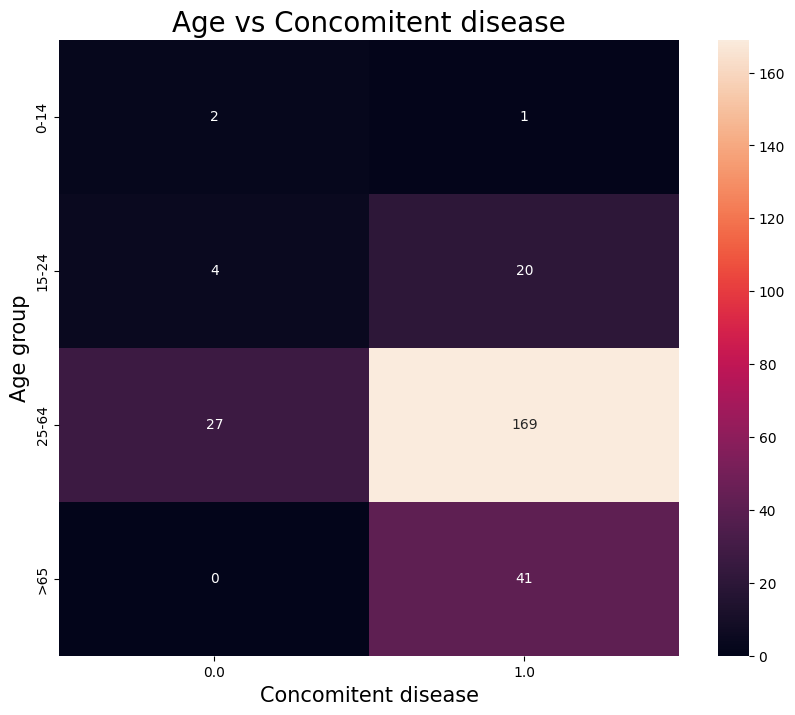

In [641]:
dh_plt.heat(dh_cross, save_name='DH-binari_', title='Age vs Concomitent disease', **{'x_lbl':'Concomitent disease', 'y_lbl':'Age group', 'fmt':'g'})

Few data in first and last category. For correct analysis data need to be grouped in two major groups

In group >65 is a evedent prevalence of presence of concomintent diseases, but there are few respondents to make statistical test

In [642]:
dh=dh.assign(bin_age = np.where((dh[h('D')]=='0-14') | (dh[h('D')]=='15-24'), '0-24', '>25'))

In [643]:
dh_red_cross=pd.crosstab(dh['bin_age'], dh['comorb'])

In [644]:
dh_red_cross

comorb,0.0,1.0
bin_age,,
0-24,6,21
>25,27,210


In [645]:
ss.chi2_contingency(dh_red_cross, correction='True')

(1.7033018552005894,
 0.19185673197858183,
 1,
 array([[  3.375,  23.625],
        [ 29.625, 207.375]]))

p>0.05 for reduced age groups. Can't reject H0 

# N vs K

H0: choise of current state colour is not related to threatening event

In [103]:
h('N,K')

['N-colour_for_current_state', 'K-threatening_event(death,sexual)']

In [104]:
h.orig('N,K')

['Позначте колір, який найкраще відображає ваш поточний стан',
 'Ви переживали, були свідком або чули від близької вам людини (родини чи друга) про загрозливу подію? Приклади включають реальну смерть або загрозу смерті, серйозні травми або сексуальне насильство']

In [646]:
nk=data[h('N,K,count')].dropna()

In [648]:
nk.groupby(h('K,N'))['count'].sum()

K-threatening_event(death,sexual)  N-colour_for_current_state
0.0                                Black                         15
                                   Blue                           3
                                   Cyan                           4
                                   Green                          0
                                   Magenta                        8
                                   Red                            7
                                   Whtie                          2
                                   Yellow                        14
1.0                                Black                         65
                                   Blue                          11
                                   Cyan                          14
                                   Green                          7
                                   Magenta                       32
                                   Red                

In [649]:
nk_cross=pd.crosstab(nk[h('K')], nk[h('N')])
nk_cross

N-colour_for_current_state,Black,Blue,Cyan,Green,Magenta,Red,Whtie,Yellow
"K-threatening_event(death,sexual)",,,,,,,,
0.0,15,3,4,0,8,7,2,14
1.0,65,11,14,7,32,41,6,34


In [650]:
nk_red_cross=nk_cross[[col for col in nk_cross.columns if col not in ['Green','Whtie','Blue']]]

In [449]:
ss.chi2_contingency(nk_red_cross, correction=1)

(3.4308467741935478,
 0.48847084001552565,
 4,
 array([[16.41025641,  3.69230769,  8.20512821,  9.84615385,  9.84615385],
        [63.58974359, 14.30769231, 31.79487179, 38.15384615, 38.15384615]]))

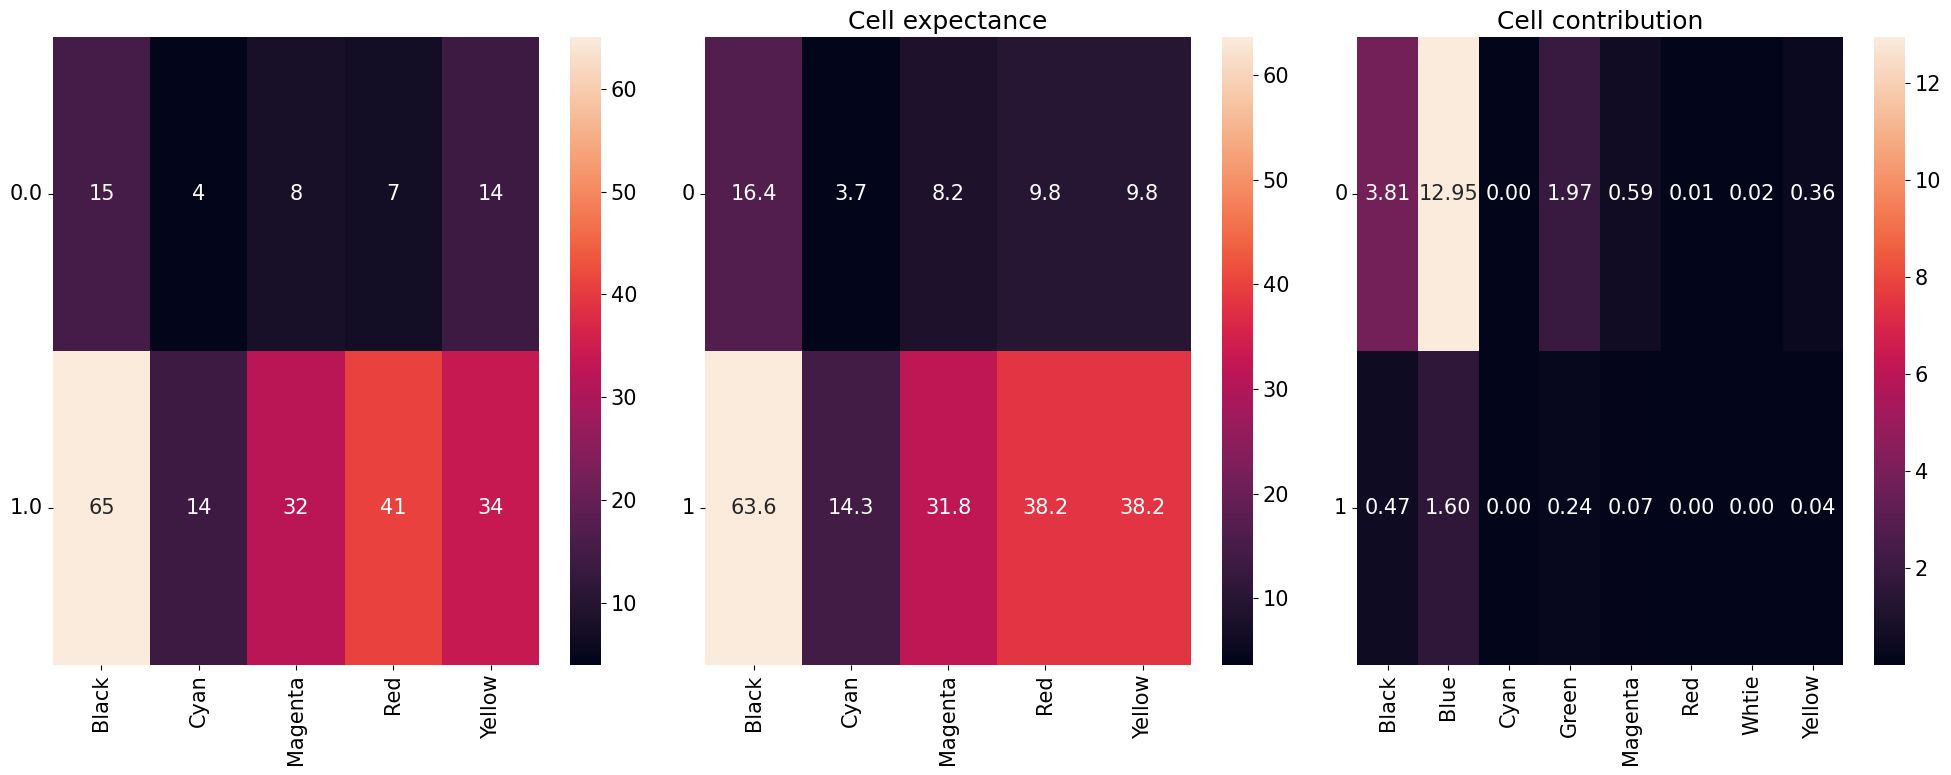

In [450]:
triple_heat(nk_red_cross)

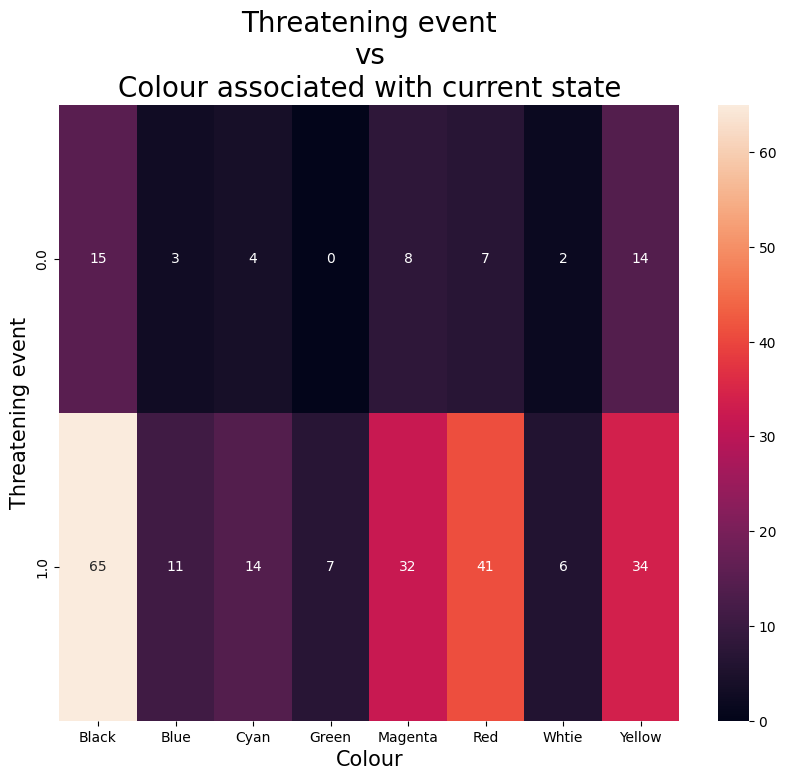

In [573]:
nk_plt.heat(nk_cross, save_name='NK', title='Threatening event\nvs\nColour associated with current state', **{'x_lbl':'Colour', 'y_lbl':'Threatening event'})

Cant reject H0

# N vs S

In [743]:
h('N,S')

['N-colour_for_current_state', 'S-most_intense_pain_in_last_4wks']

In [744]:
h.orig('N,S')

['Позначте колір, який найкраще відображає ваш поточний стан',
 'Наскільки сильним був найсильніший біль за останні 4 тижні?']

In [651]:
ns=data[h('N,S,count')].dropna()

In [652]:
ns.groupby(h('N'))[h('S')].median()

N-colour_for_current_state
Black      7.0
Blue       5.5
Cyan       6.5
Green      6.0
Magenta    7.0
Red        7.0
Whtie      6.5
Yellow     8.0
Name: S-most_intense_pain_in_last_4wks, dtype: float64

In [653]:
ns_plt=MkPlot(ns)

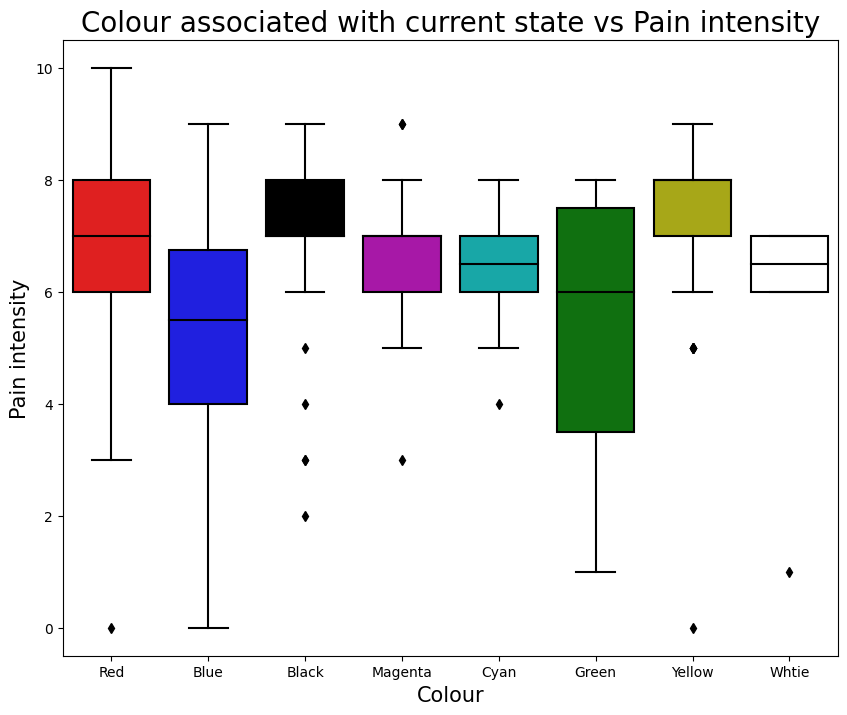

In [758]:
ns_plt.box(x=h('N'), y=h('S'), save_name='NS_colour_', title='Colour associated with current state vs Pain intensity', **{'x_lbl':'Colour', 'y_lbl':'Pain intensity','palette':'colours'})

In [662]:
interq(ns, h('N'), h('S'))

Red  7.0 (IQR 6.0-8.0), N=48
Blue  5.5 (IQR 4.0-6.75), N=14
Black  7.0 (IQR 7.0-8.0), N=80
Magenta  7.0 (IQR 6.0-7.0), N=40
Cyan  6.5 (IQR 6.0-7.0), N=18
Green  6.0 (IQR 3.5-7.5), N=7
Yellow  8.0 (IQR 7.0-8.0), N=49
Whtie  6.5 (IQR 6.0-7.0), N=8


In [666]:
gr_ns={}
for clr in ns[h('N')].unique():
  gr_ns.update({clr: pd.DataFrame(ns.loc[ns[h('N')]==clr][h('S')])})

In [667]:
ss.shapiro(ns[h('S')])

ShapiroResult(statistic=0.836998701095581, pvalue=5.637508248580985e-16)

In [668]:
for k, g in gr_ns.items():
  print(f"{k}:\t{ss.shapiro(g[h('S')])}, N={g[h('S')].count()}")

Red:	ShapiroResult(statistic=0.847265899181366, pvalue=1.8411481505609117e-05), N=48
Blue:	ShapiroResult(statistic=0.9498629570007324, pvalue=0.5585790872573853), N=14
Black:	ShapiroResult(statistic=0.8141583204269409, pvalue=1.2125833670495467e-08), N=80
Magenta:	ShapiroResult(statistic=0.8928877115249634, pvalue=0.0011948663741350174), N=40
Cyan:	ShapiroResult(statistic=0.915503978729248, pvalue=0.10762069374322891), N=18
Green:	ShapiroResult(statistic=0.8804625272750854, pvalue=0.22850902378559113), N=7
Yellow:	ShapiroResult(statistic=0.7720285654067993, pvalue=2.5940033765436965e-07), N=49
Whtie:	ShapiroResult(statistic=0.6046016216278076, pvalue=0.00017997244140133262), N=8


In [669]:
ss.kruskal(*(df[h('S')] for df in gr_ns.values()))

KruskalResult(statistic=30.21262380260691, pvalue=8.679931512766564e-05)

In [670]:
from itertools import combinations
comb=[c for c in tuple(combinations(gr_ns.keys(), 2))]

In [671]:
ns_semn=set()
ns_=list()
for c1,c2 in comb:
  stat,p=ss.mannwhitneyu(gr_ns[c1][h('S')],gr_ns[c2][h('S')])
  if p<0.05:
    print (f"{p:.3f} {c1},{c2}")
    ns_semn.add(c1); ns_semn.add(c2)
    ns_.append(c1)
    ns_.append(c2)

0.001 Red,Blue
0.029 Red,Cyan
0.046 Red,Whtie
0.000 Blue,Black
0.004 Blue,Magenta
0.000 Blue,Yellow
0.035 Black,Magenta
0.012 Black,Cyan
0.017 Black,Whtie
0.020 Magenta,Yellow
0.011 Cyan,Yellow
0.018 Yellow,Whtie


In [672]:
sorted([( c, ns_.count(c)) for c in ns_semn],key=lambda x: x[1], reverse=True)

[('Yellow', 4),
 ('Blue', 4),
 ('Black', 4),
 ('Whtie', 3),
 ('Cyan', 3),
 ('Magenta', 3),
 ('Red', 3)]

In [674]:
semn_ns_d={k:df.to_numpy().reshape(-1) for k, df in gr_ns.items() if k in ns_semn}

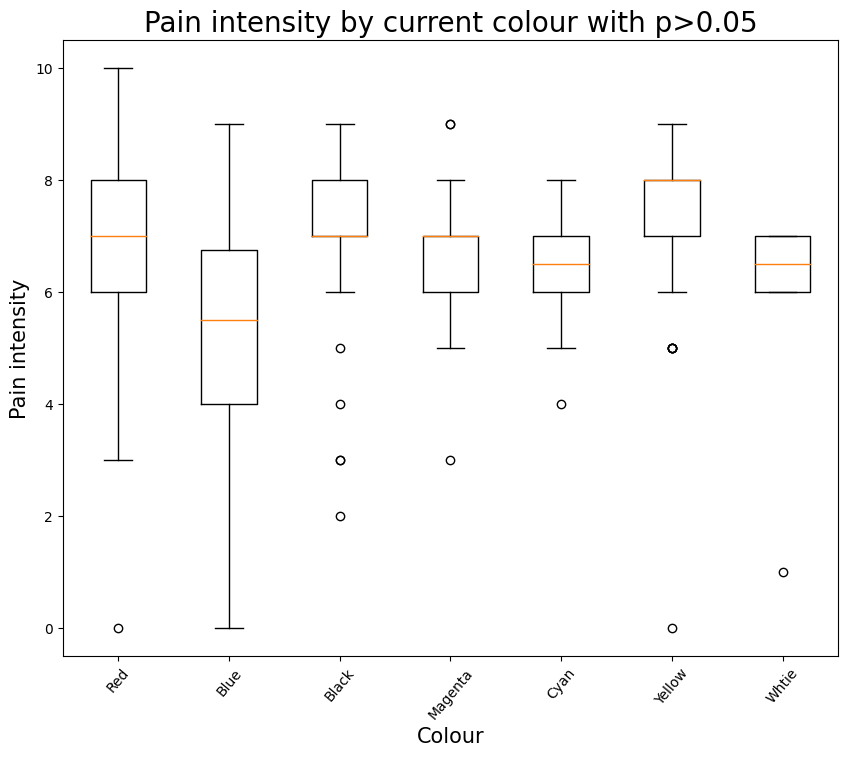

In [675]:
fig, ax = plt.subplots(1,1, figsize=(10,8))

ax.boxplot(semn_ns_d.values())
ax.set_xticklabels(semn_ns_d.keys(), fontsize=12)
#ax.imshow(sns.dark_palette("#acc", reverse=True))

plt.xticks(fontsize=10, rotation=50)
plt.title('Pain intensity by current colour with p>0.05', fontsize=20)
ax.set_xlabel('Colour', fontsize=15)
ax.set_ylabel('Pain intensity', fontsize=15)

plt.show()
fig.savefig(path+'NS_semnificative_boxplot.png')

blue lower then red, black, magenta, 

black higher then blue, maagenta, cyan, white

yellow higher than white, cyan, magenta, blue

Red higher than white, cyan, blue


# N vs E

H0: there is the same prevalence of colour preferences in all countries

In [127]:
h('N,E')

['N-colour_for_current_state', 'E-country']

In [676]:
ne=data[h('N,E,count')].dropna()

In [677]:
ne.groupby(h('E,N'))['count'].count()

E-country  N-colour_for_current_state
Canada     Black                          3
           Blue                           0
           Cyan                           0
           Green                          0
           Magenta                        0
                                         ..
Ukraine    Green                          3
           Magenta                       32
           Red                           17
           Whtie                          6
           Yellow                        24
Name: count, Length: 104, dtype: int64

In [151]:
ne_cross=pd.crosstab(ne[h('e')], ne[h('N')])

In [152]:
ne_cross

N-colour_for_current_state,Black,Blue,Cyan,Green,Magenta,Red,Whtie,Yellow
E-country,,,,,,,,
Canada,3,0,0,0,0,0,0,2
Czech Republic,6,0,2,0,1,2,0,1
Germany,9,1,0,0,0,5,0,5
Great Britan,1,0,0,1,0,0,0,2
Hungary,4,0,0,0,0,4,0,1
Italy,2,0,0,0,0,0,0,1
Poland,14,1,2,1,5,12,0,1
Republic of Moldova,5,0,1,0,0,3,0,2
Romania,4,1,0,2,2,4,2,5


Few data to analyse. Should group 

New groups Ukraine, Western Europe(Germany, Great Britain, Italy, Sweden, Switzerland), Eastern Europe(Czech Republic, Hungary, Poland, Slovakia, Romania, Republic of Moldova); Canada droped due to few data and imposibility to add it to this categories.

In [678]:
ne=ne.assign(group=np.where( (ne[h('E')]== 'Germany')\
                              | (ne[h('E')]== 'Great Britain')\
                              | (ne[h('E')]=='Italy')\
                              | (ne[h('E')]=='Sweden') \
                              | (ne[h('E')]=='Switzerland'),\
                                  'West', None))
ne=ne.assign(group=np.where( (ne[h('E')]== 'Czech Republic')\
                                | (ne[h('E')]== 'Hungary')\
                                | (ne[h('E')]== 'Poland')\
                                | (ne[h('E')]== 'Slovakia')\
                                | (ne[h('E')]== 'Romania')\
                                | (ne[h('E')]== 'Republic of Moldova'),\
                                   'East', ne_t['group']))
ne=ne.assign(group=np.where(ne[h('E')]=='Ukraine', 'Ukraine', ne_t['group']))

In [681]:
ne_red_cross=pd.crosstab(ne['group'], ne[h('N')])

In [682]:
ne_plt=MkPlot(ne)

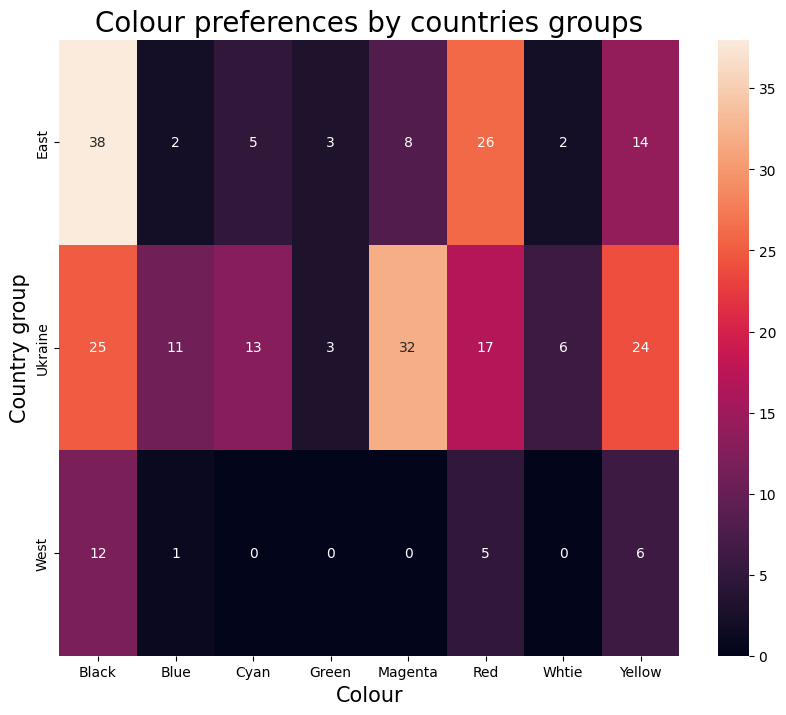

In [683]:
ne_plt.heat(ne_red_cross, save_name='NE_grouped', title='Colour preferences by countries groups', **{'y_lbl':'Country group', 'x_lbl':'Colour', 'fmt':'g'})

Still too few data in some colours categories to apply chi2

Group to Ukr and Other

In [684]:
ne=ne.assign(group=np.where(ne[h('E')]=='Ukraine', 'Ukraine', 'Other'))

In [688]:
ne_2red_cross=pd.crosstab(ne['group'], ne_t[h('N')])
ne_2red_cross

N-colour_for_current_state,Black,Blue,Cyan,Green,Magenta,Red,Whtie,Yellow
group,,,,,,,,
Other,55,3,5,4,8,31,2,25
Ukraine,25,11,13,3,32,17,6,24


In [689]:
ne_3red_cross=ne_2red_cross[[col for col in ne_2red_cross.columns if col not in ['Blue','Green', 'Whtie']]]

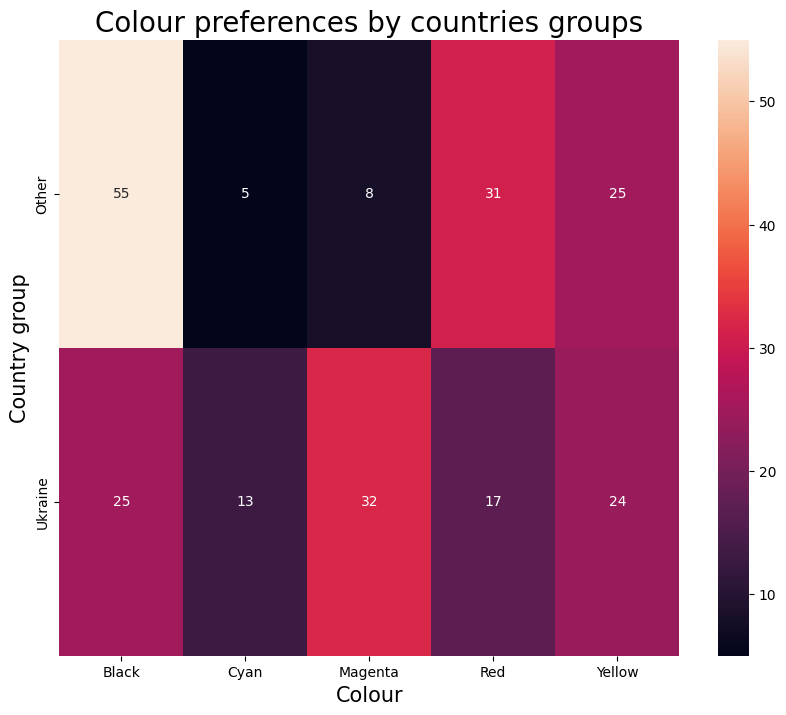

In [690]:
ne_plt.heat(ne_3red_cross, save_name='NE_binary_grouped', title='Colour preferences by countries groups', **{'y_lbl':'Country group', 'x_lbl':'Colour', 'fmt':'g'})

In [691]:
ss.chi2_contingency(ne_3red_cross, correction=1)

(32.69018689525602,
 1.3822695895110567e-06,
 4,
 array([[42.21276596,  9.49787234, 21.10638298, 25.32765957, 25.85531915],
        [37.78723404,  8.50212766, 18.89361702, 22.67234043, 23.14468085]]))

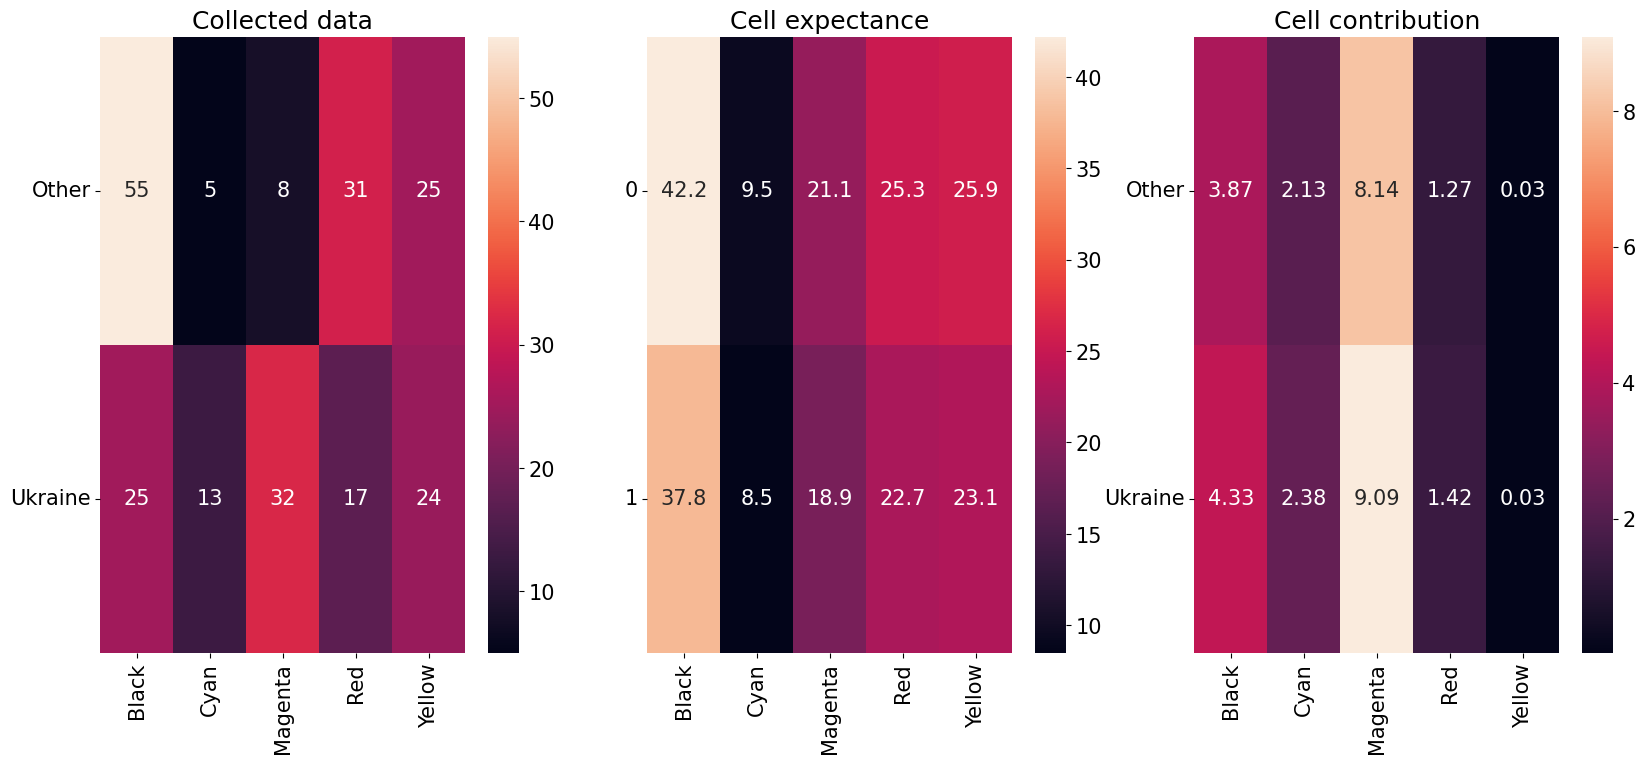

In [692]:
ne_plt.triple_heat(ne_3red_cross, save_name='NE_tirple', title='Colour for current state by country group', **{'x_lbl':'Colour', 'y_lbl':''} )

H0 can be rejected

There is a prevalence of magenta colour raported as current state colour in people living in Ukraine

There is higher probability of black to be raported as color for current state for people leaved Ukraine.

There is lower probability of magenta to be raported as colour for current state for people not living Ukraine.

There is a prevalence of black and red colours reported as colour for current state in people that lives in other contries.


# N vs G

H0: There is a conection between diagnosis and colour associated with current state.

In [297]:
h('N,G')

['N-colour_for_current_state', 'G-diagnosis']

In [706]:
ng=data[h('N,G,count')].dropna()

In [707]:
ng.head()

,N-colour_for_current_state,G-diagnosis,count
0,Red,0,1
1,Blue,Neuropathic pain,1
2,Black,0,1
3,Magenta,Chronic visceral pain,1
4,Blue,0,1


In [708]:
ng.groupby(h('G,N'))['count'].sum()

G-diagnosis           N-colour_for_current_state
0                     Black                          3
                      Blue                           6
                      Cyan                           2
                      Green                          2
                      Magenta                        6
                                                    ..
musculosceletal pain  Green                          3
                      Magenta                       13
                      Red                            2
                      White                          1
                      Yellow                        13
Name: count, Length: 64, dtype: int64

In [709]:
ng_cross=pd.crosstab(ng[h('G')], ng[h('N')])
ng_cross

N-colour_for_current_state,Black,Blue,Cyan,Green,Magenta,Red,White,Yellow
G-diagnosis,,,,,,,,
0,3,6,2,2,6,5,1,4
Cancer pain,26,1,1,2,2,24,2,13
Chronic low back pain,23,3,7,0,10,10,2,12
Chronic visceral pain,1,0,1,0,2,1,0,0
Fibromyalgia,3,0,0,0,0,0,0,3
Headache,11,0,1,0,1,4,2,3
Neuropathic pain,0,2,2,0,6,2,0,1
musculosceletal pain,13,2,4,3,13,2,1,13


few data in green and white categories.
few data in chronic visceral, fibromyalgia.

Drop this categories for futher analysis

In [710]:
ng=ng.assign(interest= np.where( (ng[h('G')]=='Fibromyalgia')\
                                | (ng[h('G')]=='Chronic visceral pain')
                                | (ng[h('G')]=='Neuropathic pain')\
                                | (ng[h('N')]=='Green')\
                                | (ng[h('N')]=='Whtie'),\
                                 np.nan, 1 ))

ng_red=ng.dropna()

In [711]:
ng_red

,N-colour_for_current_state,G-diagnosis,count,interest
0,Red,0,1,1.0
2,Black,0,1,1.0
4,Blue,0,1,1.0
5,Black,0,1,1.0
6,Cyan,0,1,1.0
...,...,...,...,...
258,Black,musculosceletal pain,1,1.0
260,Black,0,1,1.0
261,Black,Cancer pain,1,1.0
262,White,musculosceletal pain,1,1.0


In [712]:
ng_red_cross=pd.crosstab(ng_red[h('G')], ng_red[h('N')])
ng_red_cross

N-colour_for_current_state,Black,Blue,Cyan,Magenta,Red,White,Yellow
G-diagnosis,,,,,,,
0,3,6,2,6,5,1,4
Cancer pain,26,1,1,2,24,2,13
Chronic low back pain,23,3,7,10,10,2,12
Headache,11,0,1,1,4,2,3
musculosceletal pain,13,2,4,13,2,1,13


Even with some data being droped, there are still no sufficient data.

Try to group data in 2 major groups: Diagnostic and No diagnostic

In [713]:
ng_2red=ng.assign(binary= np.where( (ng[h('G')]=='0')\
                                , 0, 1))
ng_2red

,N-colour_for_current_state,G-diagnosis,count,interest,binary
0,Red,0,1,1.0,0
1,Blue,Neuropathic pain,1,NaN,1
2,Black,0,1,1.0,0
3,Magenta,Chronic visceral pain,1,NaN,1
4,Blue,0,1,1.0,0
...,...,...,...,...,...
260,Black,0,1,1.0,0
261,Black,Cancer pain,1,1.0,1
262,White,musculosceletal pain,1,1.0,1
263,Green,Cancer pain,1,NaN,1


In [301]:
ng_2red_cross=pd.crosstab(ng_2red['binary'], ng_2red[h('N')])
ng_2red_cross

N-colour_for_current_state,Black,Blue,Cyan,Green,Magenta,Red,Whtie,Yellow
binary,,,,,,,,
0,3,6,2,2,6,5,1,4
1,77,8,16,5,34,43,7,45


In [714]:
ng_3red_cross=ng_2red_cross[[col for col in ng_2red_cross.columns if col not in ['Cyan','Green', 'Whtie', 'Yellow']]]

In [716]:
ss.chi2_contingency(ng_3red_cross)

(19.495720164609054,
 0.00021589319015555747,
 3,
 array([[ 8.79120879,  1.53846154,  4.3956044 ,  5.27472527],
        [71.20879121, 12.46153846, 35.6043956 , 42.72527473]]))

In [717]:
ng_plt=MkPlot(ng)

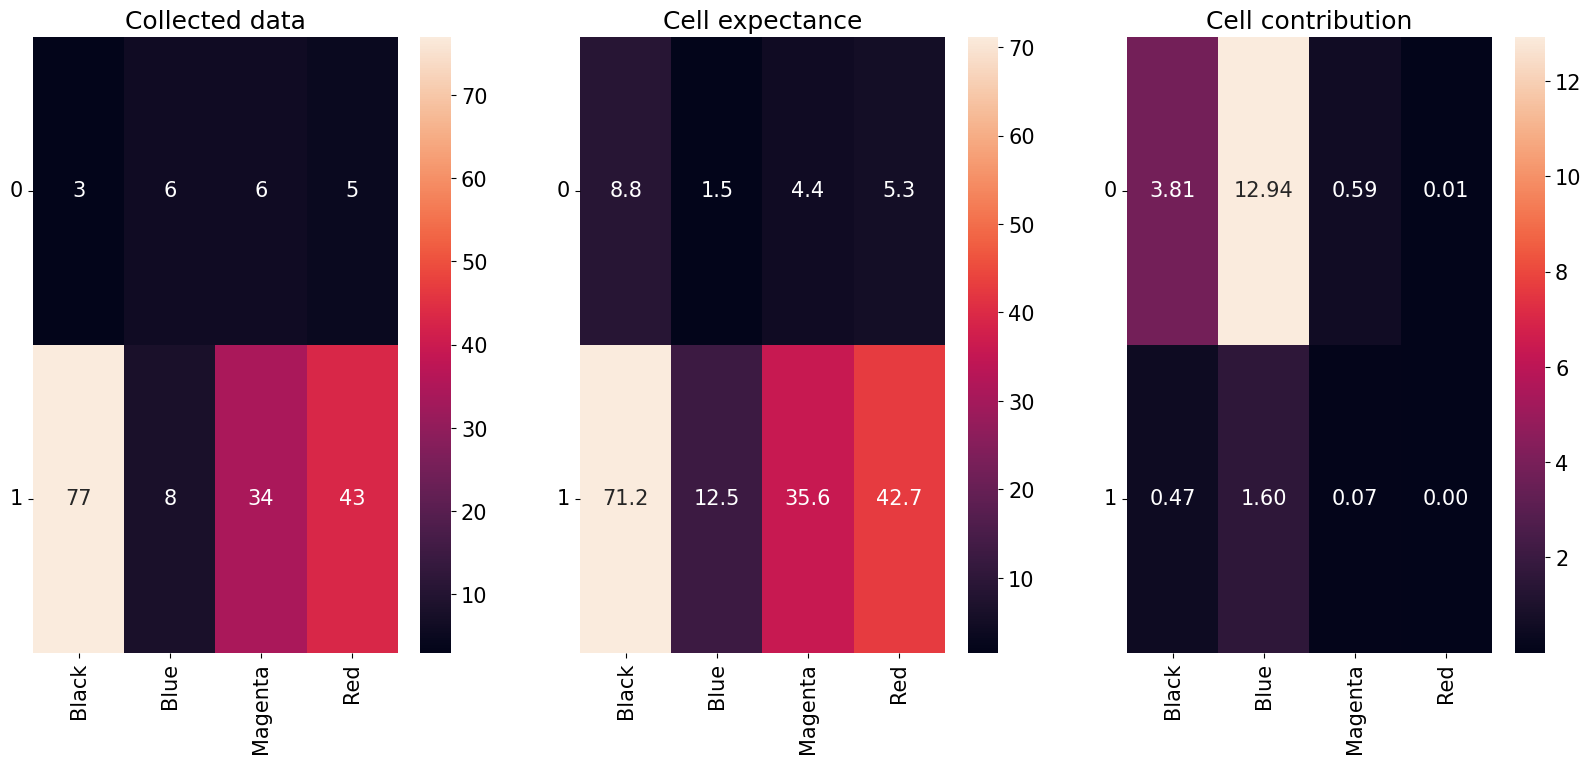

In [718]:
ng_plt.triple_heat(ng_3red_cross)

High probability of type 2 error

Cant't reject H0, few data on some categories.

Tendencies:

Blue colour is preferred in no diagnostic group, 


In cancer pain group is more probable to be selected red colour, less probably to be selectet magenta.

In musculosceletal pain group is more probable to be selected magenta with lower probability to be selected red colour.


# N vs M

H0 there is no association between distress feelings after threatening event and current state colour.

In [296]:
h('N,M')

['N-colour_for_current_state', 'M-distress_feelings_after_thr_event']

In [719]:
nm=data[h('N,M,count')].dropna()
nm.head()

,N-colour_for_current_state,M-distress_feelings_after_thr_event,count
0,Red,1,1
1,Blue,1,1
2,Black,1,1
3,Magenta,1,1
4,Blue,0,1


In [311]:
nm.groupby(h('M,N'))['count'].sum()

M-distress_feelings_after_thr_event  N-colour_for_current_state
0                                    Black                         10
                                     Blue                           6
                                     Cyan                          10
                                     Green                          2
                                     Magenta                       15
                                     Red                            1
                                     Whtie                          4
                                     Yellow                         9
1                                    Black                         70
                                     Blue                           8
                                     Cyan                           8
                                     Green                          5
                                     Magenta                       25
                          

In [720]:
nm_cross=pd.crosstab(nm[h('M')], nm[h('N')])
nm_cross

N-colour_for_current_state,Black,Blue,Cyan,Green,Magenta,Red,White,Yellow
M-distress_feelings_after_thr_event,,,,,,,,
0,10,6,10,2,15,1,4,9
1,70,8,8,5,25,47,4,40


In [721]:
nm_red_cross=nm_cross[[col for col in nm_cross.columns if col not in ['Green', 'Red', 'White']]]

In [724]:
ss.chi2_contingency(nm_red_cross, correction=1)

(22.56695195296662,
 0.00015451474429588596,
 4,
 array([[19.90049751,  3.48258706,  4.47761194,  9.95024876, 12.18905473],
        [60.09950249, 10.51741294, 13.52238806, 30.04975124, 36.81094527]]))

In [725]:
nm_plt=MkPlot(nm)

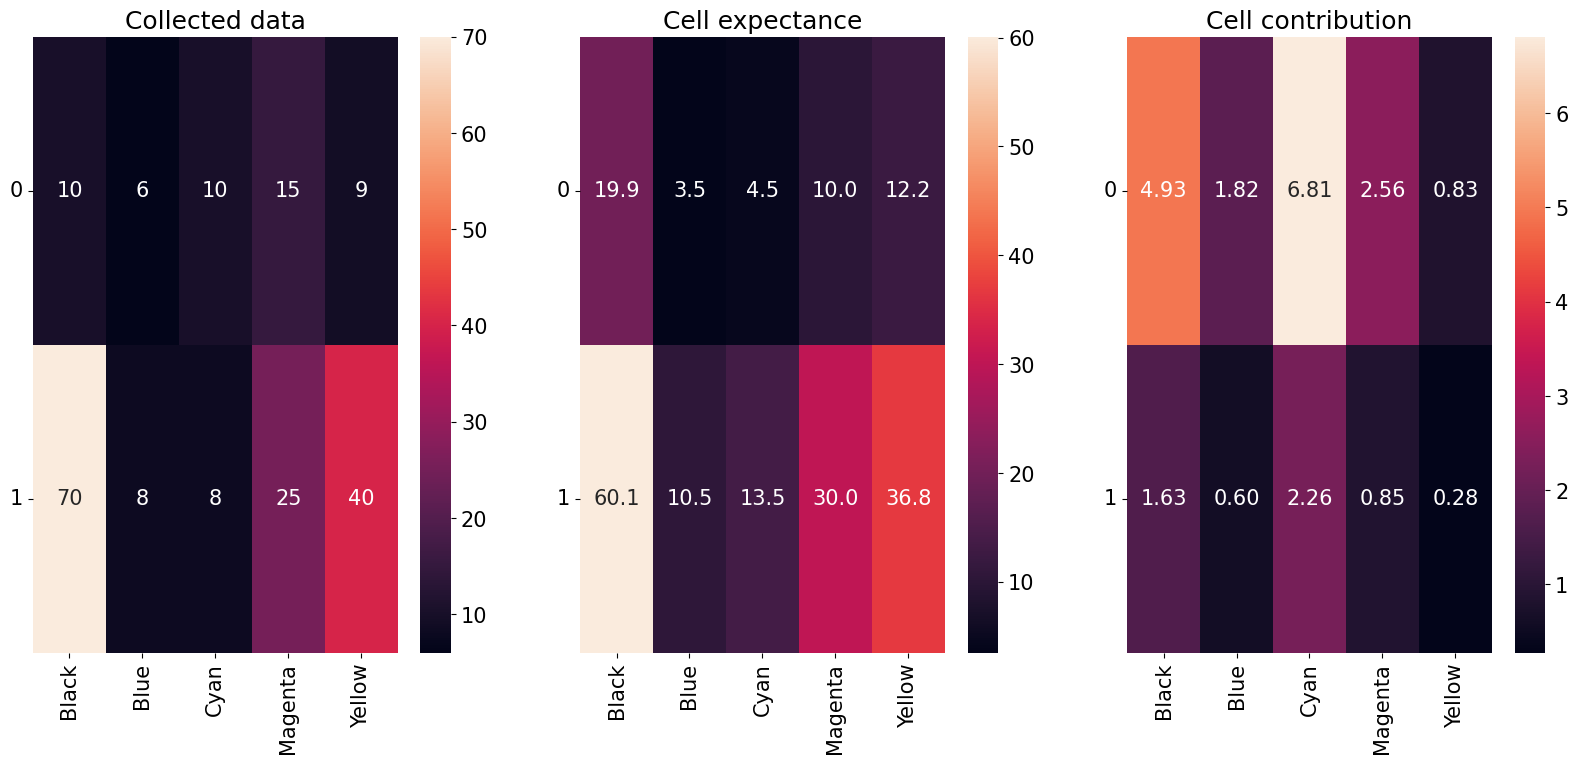

In [726]:
nm_plt.triple_heat(nm_red_cross)

H0 can be rejected

There is more probability cyan to be reported in 0 group

There is less probability red to be reported in 0 group

There is more probabitity magenta to be reported in 0 group


# N vs L

There is no association between current state colour and involuntary memories after threatening event

In [348]:
h('N,L')

['N-colour_for_current_state', 'L-involuntary_memories_after_thr_event']

In [727]:
nl=data[h('N,L,count')].dropna()
nl.head()

,N-colour_for_current_state,L-involuntary_memories_after_thr_event,count
0,Red,0.0,1
1,Blue,1.0,1
2,Black,1.0,1
3,Magenta,1.0,1
4,Blue,1.0,1


In [355]:
nl.groupby(h('L,N'))['count'].sum()

L-involuntary_memories_after_thr_event  N-colour_for_current_state
0.0                                     Black                          6
                                        Blue                           6
                                        Cyan                           8
                                        Green                          3
                                        Magenta                       21
                                        Red                            5
                                        Whtie                          2
                                        Yellow                         6
1.0                                     Black                         73
                                        Blue                           8
                                        Cyan                          10
                                        Green                          4
                                        Magenta          

In [359]:
nl_cross=pd.crosstab(nl[h('L')], nl[h('N')])
nl_cross

N-colour_for_current_state,Black,Blue,Cyan,Green,Magenta,Red,Whtie,Yellow
L-involuntary_memories_after_thr_event,,,,,,,,
0.0,6,6,8,3,21,5,2,6
1.0,73,8,10,4,19,42,5,43


Perform test on reduced data, drop columns with cells < 5

In [728]:
nl_red_cross=nl_cross[[col for col in nl_cross.columns if col not in ['Green', 'Whtie']]]

In [729]:
nl_red_cross

N-colour_for_current_state,Black,Blue,Cyan,Magenta,Red,Yellow
L-involuntary_memories_after_thr_event,,,,,,
0.0,6,6,8,21,5,6
1.0,73,8,10,19,42,43


In [733]:
ss.chi2_contingency(nl_red_cross, correction=True)

(47.69363942244762,
 4.10192961294705e-09,
 5,
 array([[16.63157895,  2.94736842,  3.78947368,  8.42105263,  9.89473684,
         10.31578947],
        [62.36842105, 11.05263158, 14.21052632, 31.57894737, 37.10526316,
         38.68421053]]))

In [734]:
nl_plt=MkPlot(nl)

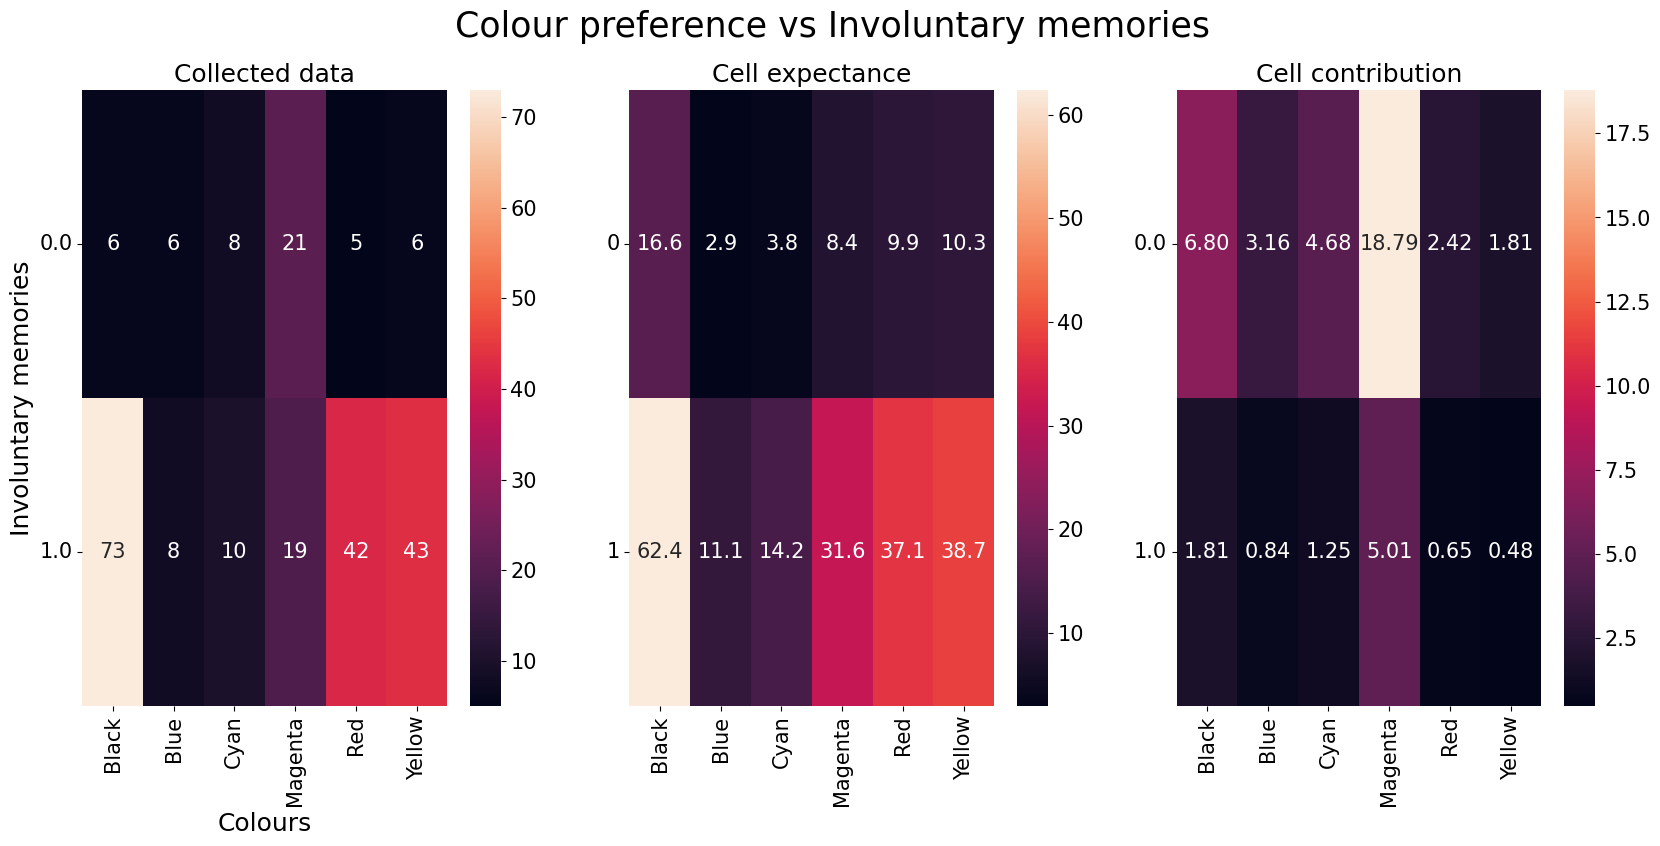

In [735]:
nl_plt.triple_heat(nl_red_cross, save_name='NL_triple' title='Colour preference vs Involuntary memories', **{'x_lbl':'Colours', 'y_lbl':'Involuntary memories'})

The frequency of black in group without involuntary memories is lower then in other group

The freqency of blue in group without involuntary memories is lower then in other group

Few data to make other conclusion


# N vs U

There is no association between colour for current state and feeling guilt of shame about threatening event

In [409]:
h('N,U')

['N-colour_for_current_state', 'U-feel_fear-guilt-shame_about_thr_event']

In [736]:
nu=data[h('N,U,count')].dropna()

In [413]:
nu.groupby(h('U,N'))['count'].sum()

U-feel_fear-guilt-shame_about_thr_event  N-colour_for_current_state
0                                        Black                         10
                                         Blue                           6
                                         Cyan                           6
                                         Green                          3
                                         Magenta                       14
                                         Red                            8
                                         Whtie                          2
                                         Yellow                        11
1                                        Black                         70
                                         Blue                           8
                                         Cyan                          12
                                         Green                          4
                                         Mag

In [415]:
pd.crosstab(nu[h('U')], nu[h('N')], margins=1)

N-colour_for_current_state,Black,Blue,Cyan,Green,Magenta,Red,Whtie,Yellow,All
U-feel_fear-guilt-shame_about_thr_event,,,,,,,,,
0,10,6,6,3,14,8,2,11,60
1,70,8,12,4,26,40,6,38,204
All,80,14,18,7,40,48,8,49,264


In [416]:
nu_cross=pd.crosstab(nu[h('U')], nu[h('N')])

In [737]:
nu_red_cross=nu_cross[[col for col in nl_cross.columns if col not in ['Green', 'Whtie']]]

In [738]:
ss.chi2_contingency(nu_red_cross, correction=1)

(13.803824091961058,
 0.016904763026079253,
 5,
 array([[17.67068273,  3.09236948,  3.97590361,  8.83534137, 10.60240964,
         10.82329317],
        [62.32931727, 10.90763052, 14.02409639, 31.16465863, 37.39759036,
         38.17670683]]))

In [739]:
nu_plt=MkPlot(nu)

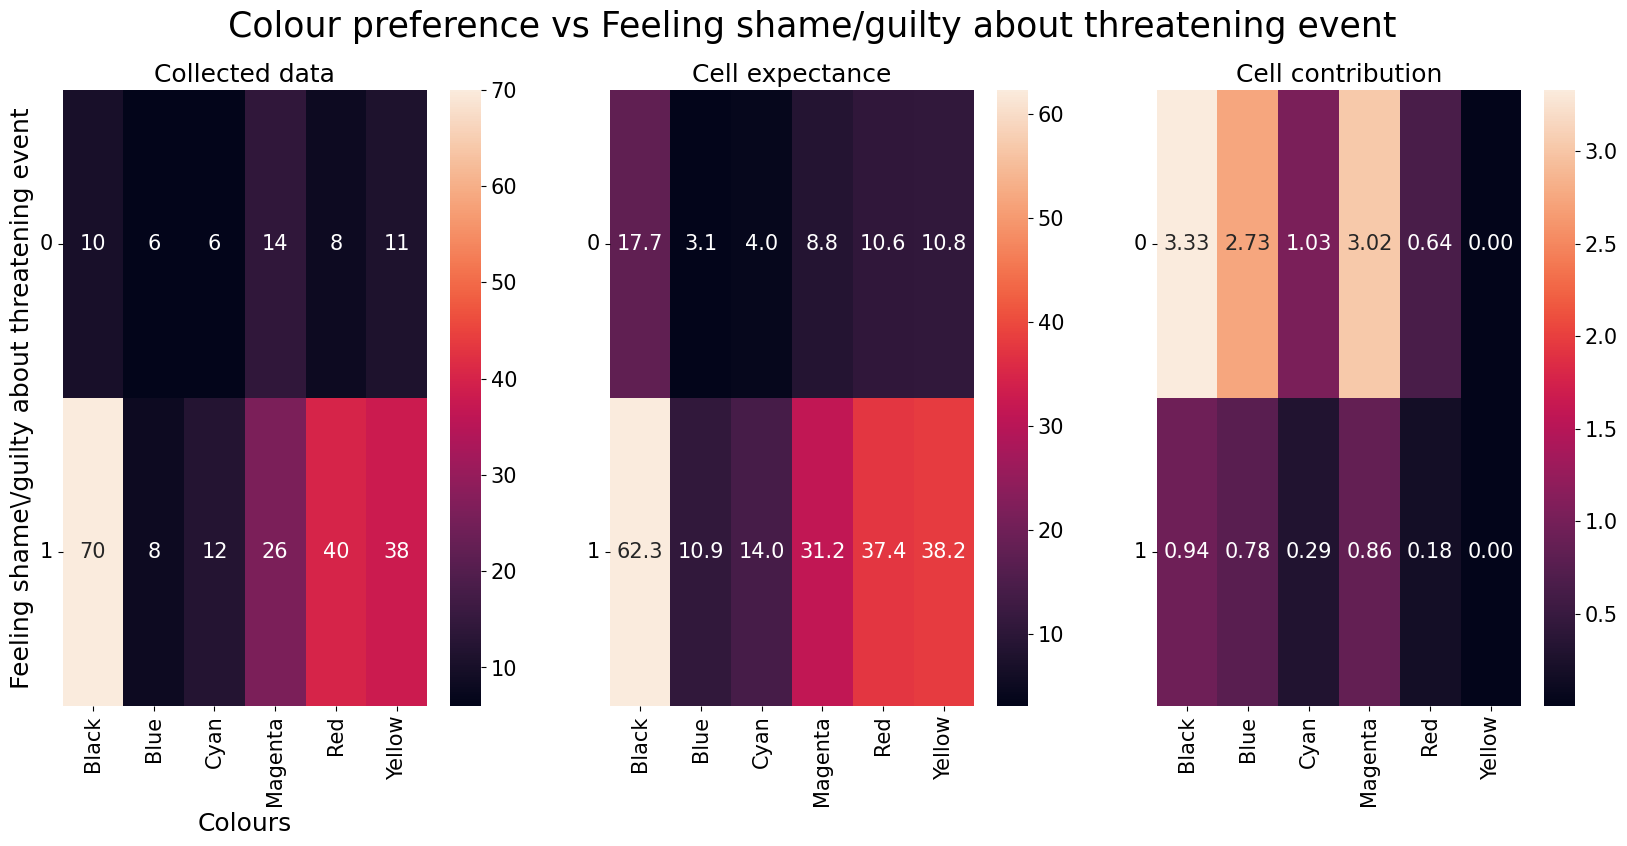

In [744]:
nu_plt.triple_heat(nu_red_cross, save_name='NU_triple', title='Colour preference vs Feeling shame/guilty about threatening event', **{'x_lbl':'Colours','y_lbl':'Feeling shame\/guilty about threatening event'})

There is lower probability of black in group without feeling of guilt or shame about threatening event is lower then in other group.

The freqency of blue in group without feeling of guilt or shame about threatening event is higher then in other group.

# N vs Y

There is no association between colour for current state and difficulties to feel happiness, contentment, love

In [425]:
h('N,Y')

['N-colour_for_current_state',
 'Y-find_difficult_to_feel_happiness-contentment-love']

In [427]:
ny=data[h('N,Y,count')].dropna()

In [428]:
ny.groupby(h('Y,N'))['count'].sum()

Y-find_difficult_to_feel_happiness-contentment-love  N-colour_for_current_state
0.0                                                  Black                         13
                                                     Blue                           6
                                                     Cyan                           8
                                                     Green                          4
                                                     Magenta                       11
                                                     Red                            4
                                                     Whtie                          4
                                                     Yellow                        12
1.0                                                  Black                         66
                                                     Blue                           8
                                                     Cyan   

In [429]:
pd.crosstab(ny[h('Y')], ny[h('N')], margins=1)

N-colour_for_current_state,Black,Blue,Cyan,Green,Magenta,Red,Whtie,Yellow,All
Y-find_difficult_to_feel_happiness-contentment-love,,,,,,,,,
0.0,13,6,8,4,11,4,4,12,62
1.0,66,8,9,3,29,44,4,37,200
All,79,14,17,7,40,48,8,49,262


In [430]:
ny_cross=pd.crosstab(ny[h('Y')], ny[h('N')])

In [431]:
ss.chi2_contingency(ny_cross)

(24.28249593920868,
 0.0010161128894493805,
 7,
 array([[18.69465649,  3.3129771 ,  4.02290076,  1.65648855,  9.46564885,
         11.35877863,  1.89312977, 11.59541985],
        [60.30534351, 10.6870229 , 12.97709924,  5.34351145, 30.53435115,
         36.64122137,  6.10687023, 37.40458015]]))

In [435]:
ny_red_cross=ny_cross[[col for col in nl_cross.columns if col not in ['Green']]]

In [746]:
ss.chi2_contingency(ny_red_cross)

(20.37552593490407,
 0.002373685830711826,
 6,
 array([[17.96862745,  3.18431373,  3.86666667,  9.09803922, 10.91764706,
          1.81960784, 11.14509804],
        [61.03137255, 10.81568627, 13.13333333, 30.90196078, 37.08235294,
          6.18039216, 37.85490196]]))

In [748]:
ny_plt=MkPlot(ny)

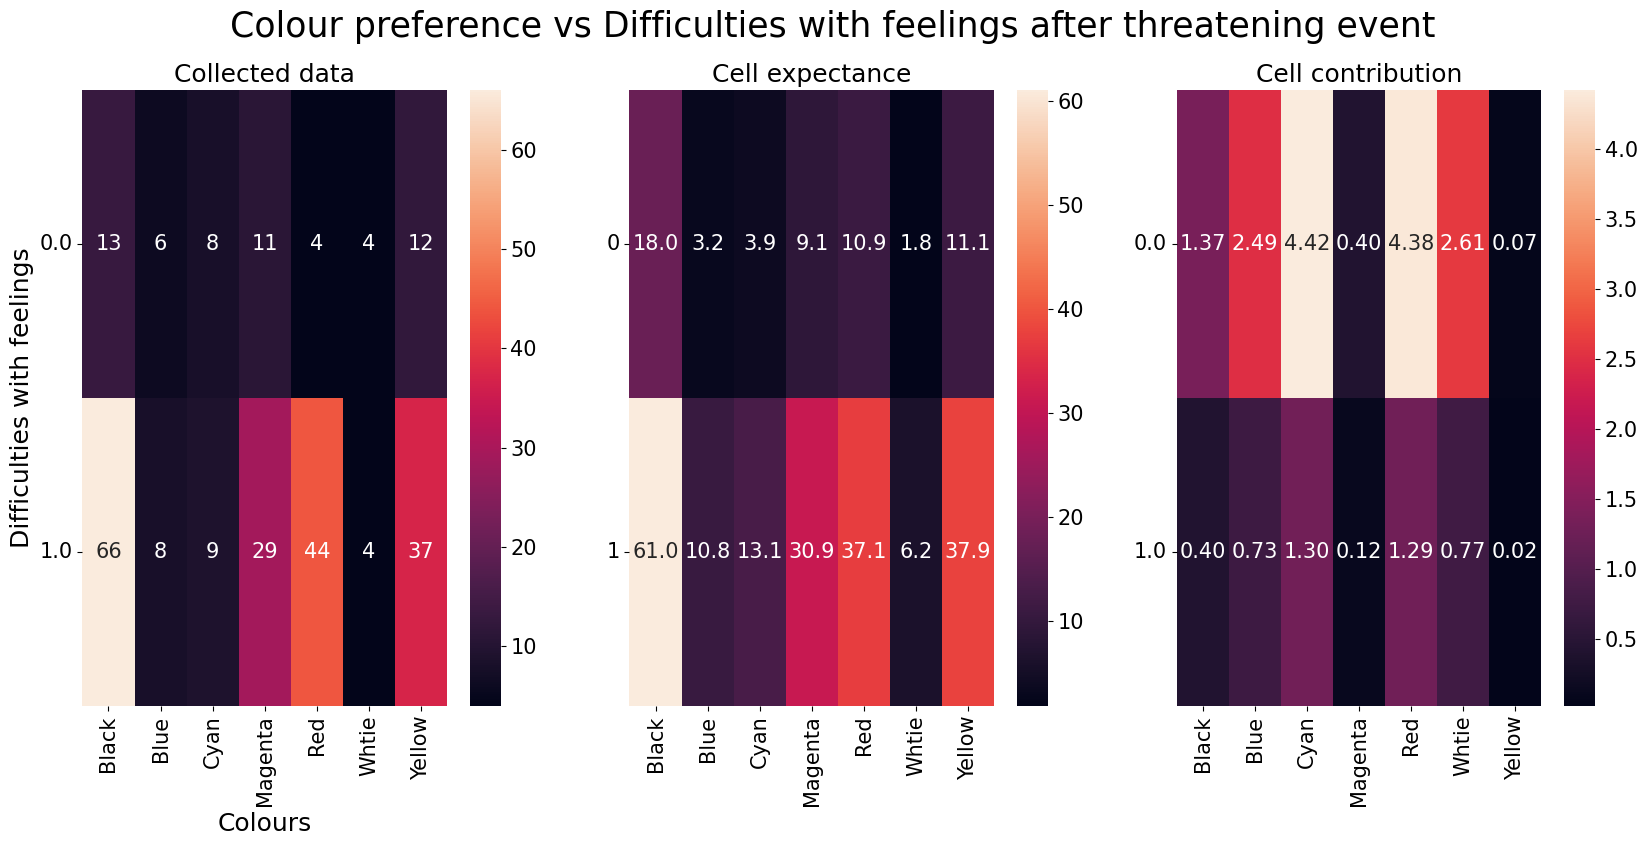

In [750]:
ny_plt.triple_heat(ny_red_cross, save_name='NY_triple', title='Colour preference vs Difficulties with feelings after threatening event', **{'x_lbl':'Colours','y_lbl':'Difficulties with feelings'})

There is lower probability of black in group without difficulties of feeling is lower then in other group.

The freqency of blue in group without difficulties of feeling is higher then in other group.

# E G S

In [ ]:
h('E,G,S')

['E-country', 'G-diagnosis', 'S-most_intense_pain_in_last_4wks']

In [ ]:
egs=data[h('E,G,S')]

In [ ]:
egs=egs.assign(count=1)

In [ ]:
egs_bc=egs.groupby(h('E,G'))[h('S')].median()

In [ ]:
egs_bc.reset_index().head(100)

,E-country,G-diagnosis,S-most_intense_pain_in_last_4wks
0,Canada,0,NaN
1,Canada,Cancer pain,NaN
2,Canada,Chronic low back pain,8.0
3,Canada,Chronic visceral pain,NaN
4,Canada,Fibromyalgia,NaN
...,...,...,...
95,Switzerland,musculosceletal pain,NaN
96,Ukraine,0,5.0
97,Ukraine,Cancer pain,7.0
98,Ukraine,Chronic low back pain,7.0


In [ ]:
fegs.groupby(h(''))

In [ ]:
sns.boxplot(egs_bc[h('S')])

# GIT

In [753]:
%bash
git config --global user.email "manastirschi.stanislav@gmail.com"
git config --global user.name "Manastirschi Stanislav"

SyntaxError: invalid syntax (343386298.py, line 2)